#讀取雲端硬碟

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#安裝套件

In [2]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-07-15 22:49:03--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-07-15 22:49:03--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.0.65, 2607:f8b0:4025:810::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  21.7MB/s    in 0.9s    

2024-07-15 22:49:09 (21.7 MB/s) 

In [3]:
!pip install xgboost
!pip install shap
!pip install fancyimpute
!pip install tabulate
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=c3ef7298d9c6da854cdcb6fc00aa87228ae1ad672ccba59d1541283f70b3a251
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=29a7b3a0fe081e923b82c565f90dd6aeb9781ad70aeb09ce61288011cdd3f722
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 29.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstall

#引用函式庫

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
from tabulate import tabulate
import shap
import xgboost
import chardet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from fancyimpute import KNN
from fancyimpute import IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

#資料分析

In [19]:
# 使用 chardet 檢測 CSV 文件的編碼方式
with open('/content/drive/MyDrive/test1.csv', 'rb') as f:
    result = chardet.detect(f.read())

# 印出檢測結果
#print(result)

# 使用檢測到的編碼方式讀取 CSV 文件
df = pd.read_csv('/content/drive/MyDrive/test1.csv', encoding=result['encoding'])
print("Data frame has {} rows and {} columns".format(df.shape[0],df.shape[1]))
df

Data frame has 2295 rows and 56 columns


,age,sex,blood type,Before-vaccination-MeDipro-predicted-IU,1-manufacturers,1-Days,1-fever,1-drug,1-predicted IU,2-manufacturers,...,氣喘,缺血性心臟病,惡性腫瘤,婦科疾病,肺結核,肺炎,接受過免疫抑制之療程?,其他慢性病,缺、未知.1,none
0,52,1,NaN,3.94,0,28,NaN,NaN,6.42,0,...,0,0,0,0,0,0,0,0,0,1
1,60,1,0.0,3.99,0,30,NaN,NaN,10.66,0,...,0,0,0,0,0,0,0,0,0,1
2,42,0,NaN,4.09,0,20,NaN,NaN,32.34,NaN,...,0,0,0,0,0,0,0,0,0,1
3,55,0,1.0,NaN,0,50,2,1,26.63,2,...,0,0,0,0,0,0,0,0,0,1
4,53,0,0.0,NaN,0,50,3,1,19.61,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,31,0,NaN,NaN,2,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,1,0
2291,21,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,0
2292,51,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,0
2293,44,0,NaN,NaN,0,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,1,0


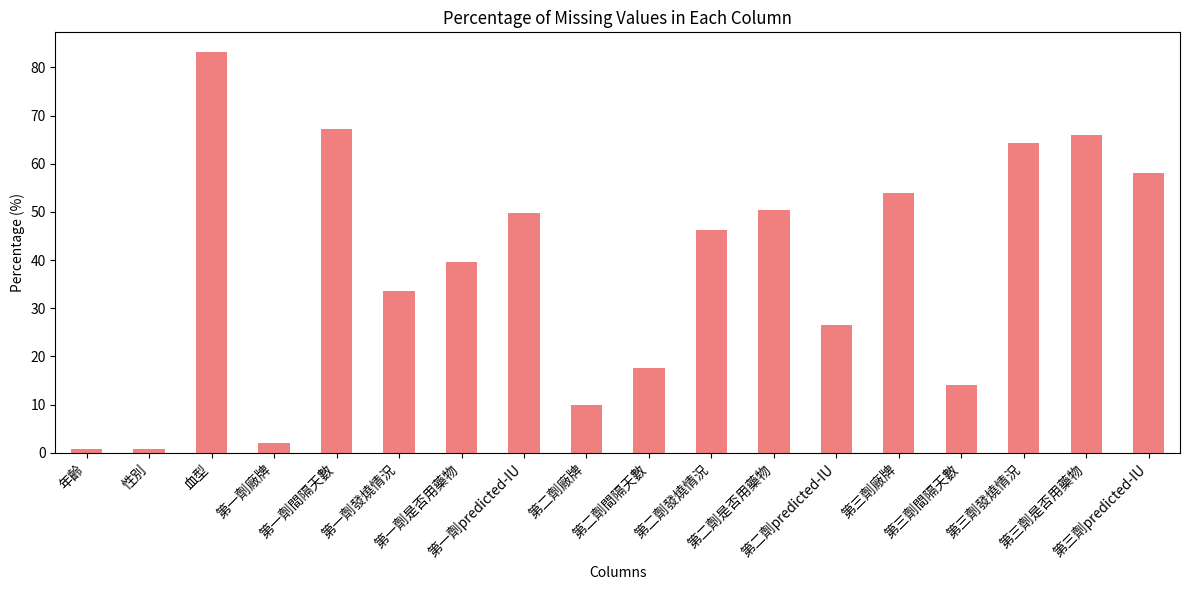

In [14]:
# 計算每個欄位的空值比例
null_counts = new_df.isnull().mean() * 100

# 繪製空值比圖
plt.figure(figsize=(12, 6))
null_counts.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
df.isnull().mean() * 100 # 空值比

import pandas as pd

# 創建包含數據的 DataFrame
data = {
    '欄位名稱': ['年齡', '性別', '血型', '接種前 IU',
           '第一劑廠牌', '第一劑間隔天數', '第一劑發燒情況', '第一劑是否用藥物', '第一劑 IU',
           '第二劑廠牌', '第二劑間隔天數', '第二劑發燒情況', '第二劑是否用藥物', '第二劑 IU',
           '第三劑廠牌', '第三劑間隔天數', '第三劑發燒情況', '第三劑是否用藥物', '第三劑 IU',
           '第四劑廠牌', '第四劑間隔天數', '第四劑發燒情況', '第四劑是否用藥物', '第四劑 IU',
           '第五劑廠牌', '第五劑間隔天數', '第五劑發燒情況', '第五劑是否用藥物', '第五劑 IU'],
    '空值比例(%)': [0.784314, 0.784314, 83.093682, 73.202614,
                2.047930, 67.276688, 33.551198, 39.651416, 49.847495,
                9.891068, 17.690632, 46.143791, 50.457516, 26.623094,
                53.986928, 14.161220, 64.357298, 66.056645, 58.126362,
                97.080610, 85.664488, 82.004357, 83.747277, 97.690632,
                99.433551, 99.477124, 83.442266, 85.054466, 99.433551]
}

df = pd.DataFrame(data)

# 格式化數字對齊
df['空值比例(%)'] = df['空值比例(%)'].map('{:.2f}'.format)

# 顯示對齊後的 DataFrame
df

,欄位名稱,空值比例(%)
0,年齡,0.78
1,性別,0.78
2,血型,83.09
3,接種前 IU,73.20
4,第一劑廠牌,2.05
5,第一劑間隔天數,67.28
6,第一劑發燒情況,33.55
7,第一劑是否用藥物,39.65
8,第一劑 IU,49.85
9,第二劑廠牌,9.89


In [22]:
# 使用 chardet 檢測 CSV 文件的編碼方式
with open('/content/drive/MyDrive/test1.csv', 'rb') as f:
    result = chardet.detect(f.read())

# 印出檢測結果
#print(result)

# 使用檢測到的編碼方式讀取 CSV 文件
df = pd.read_csv('/content/drive/MyDrive/test1.csv', encoding=result['encoding'])
print("Data frame has {} rows and {} columns".format(df.shape[0],df.shape[1]))
df

# 挑選出不含"4-"和"5-"的欄位名稱
#selected_columns = [col for col in df.columns if '4-' not in col and '5-' not in col]

# 使用選擇的欄位創建新的DataFrame
#new_df = df[selected_columns]
new_df = df[['age', 'sex',
       '1-manufacturers', '1-Days', '1-fever', '1-drug', '1-predicted IU',
       '2-manufacturers', '2-Days', '2-fever', '2-drug', '2-predicted IU',
       '3-manufacturers', '3-Days', '3-fever', '3-drug', '3-predicted IU'
             ]]

# 定義中文欄位名稱的字典
chinese_columns = {
    'age': '年齡',
    'sex': '性別',
    '1-manufacturers': '第一劑廠牌',
    '1-Days': '第一劑間隔天數',
    '1-fever': '第一劑發燒情況',
    '1-drug': '第一劑是否用藥物',
    '1-predicted IU': '第一劑 IU',
    '2-manufacturers': '第二劑廠牌',
    '2-Days': '第二劑間隔天數',
    '2-fever': '第二劑發燒情況',
    '2-drug': '第二劑是否用藥物',
    '2-predicted IU': '第二劑 IU',
    '3-manufacturers': '第三劑廠牌',
    '3-Days': '第三劑間隔天數',
    '3-fever': '第三劑發燒情況',
    '3-drug': '第三劑是否用藥物',
    '3-predicted IU': '第三劑 IU'
}

# 將欄位名稱改成中文
new_df.rename(columns=chinese_columns, inplace=True)

# 顯示新的DataFrame
new_df

Data frame has 2295 rows and 56 columns


<ipython-input-22-3eb9d3d65fde>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns=chinese_columns, inplace=True)


,年齡,性別,第一劑廠牌,第一劑間隔天數,第一劑發燒情況,第一劑是否用藥物,第一劑 IU,第二劑廠牌,第二劑間隔天數,第二劑發燒情況,第二劑是否用藥物,第二劑 IU,第三劑廠牌,第三劑間隔天數,第三劑發燒情況,第三劑是否用藥物,第三劑 IU
0,52,1,0,28,NaN,NaN,6.42,0,17.0,0.0,0.0,185.25,2,198.0,NaN,NaN,178.74
1,60,1,0,30,NaN,NaN,10.66,0,20.0,0.0,0.0,152.9,5,49.0,0,0,88.13
2,42,0,0,20,NaN,NaN,32.34,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,55,0,0,50,2,1,26.63,2,28.0,2.0,0.0,1165.26,2,111.0,0,0,629.33
4,53,0,0,50,3,1,19.61,0,59.0,0.0,0.0,15.22,2,125.0,0,0,186.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,31,0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,1,67.0,NaN,NaN,475.60
2291,21,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,5,39.0,NaN,NaN,164.54
2292,51,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,98.0,NaN,NaN,767.81
2293,44,0,0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,105.0,NaN,NaN,1041.05


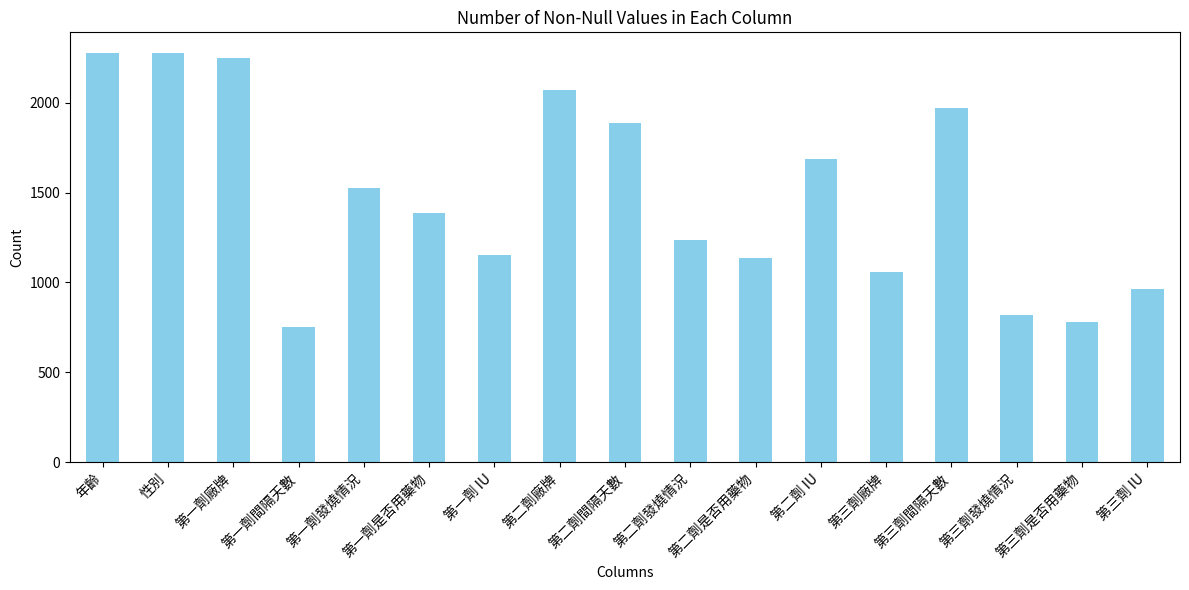

In [23]:
#各欄位數量圖

# 計算每個欄位的數量
column_counts = new_df.count()

# 繪製欄位數量圖
plt.figure(figsize=(12, 6))
column_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Non-Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: >

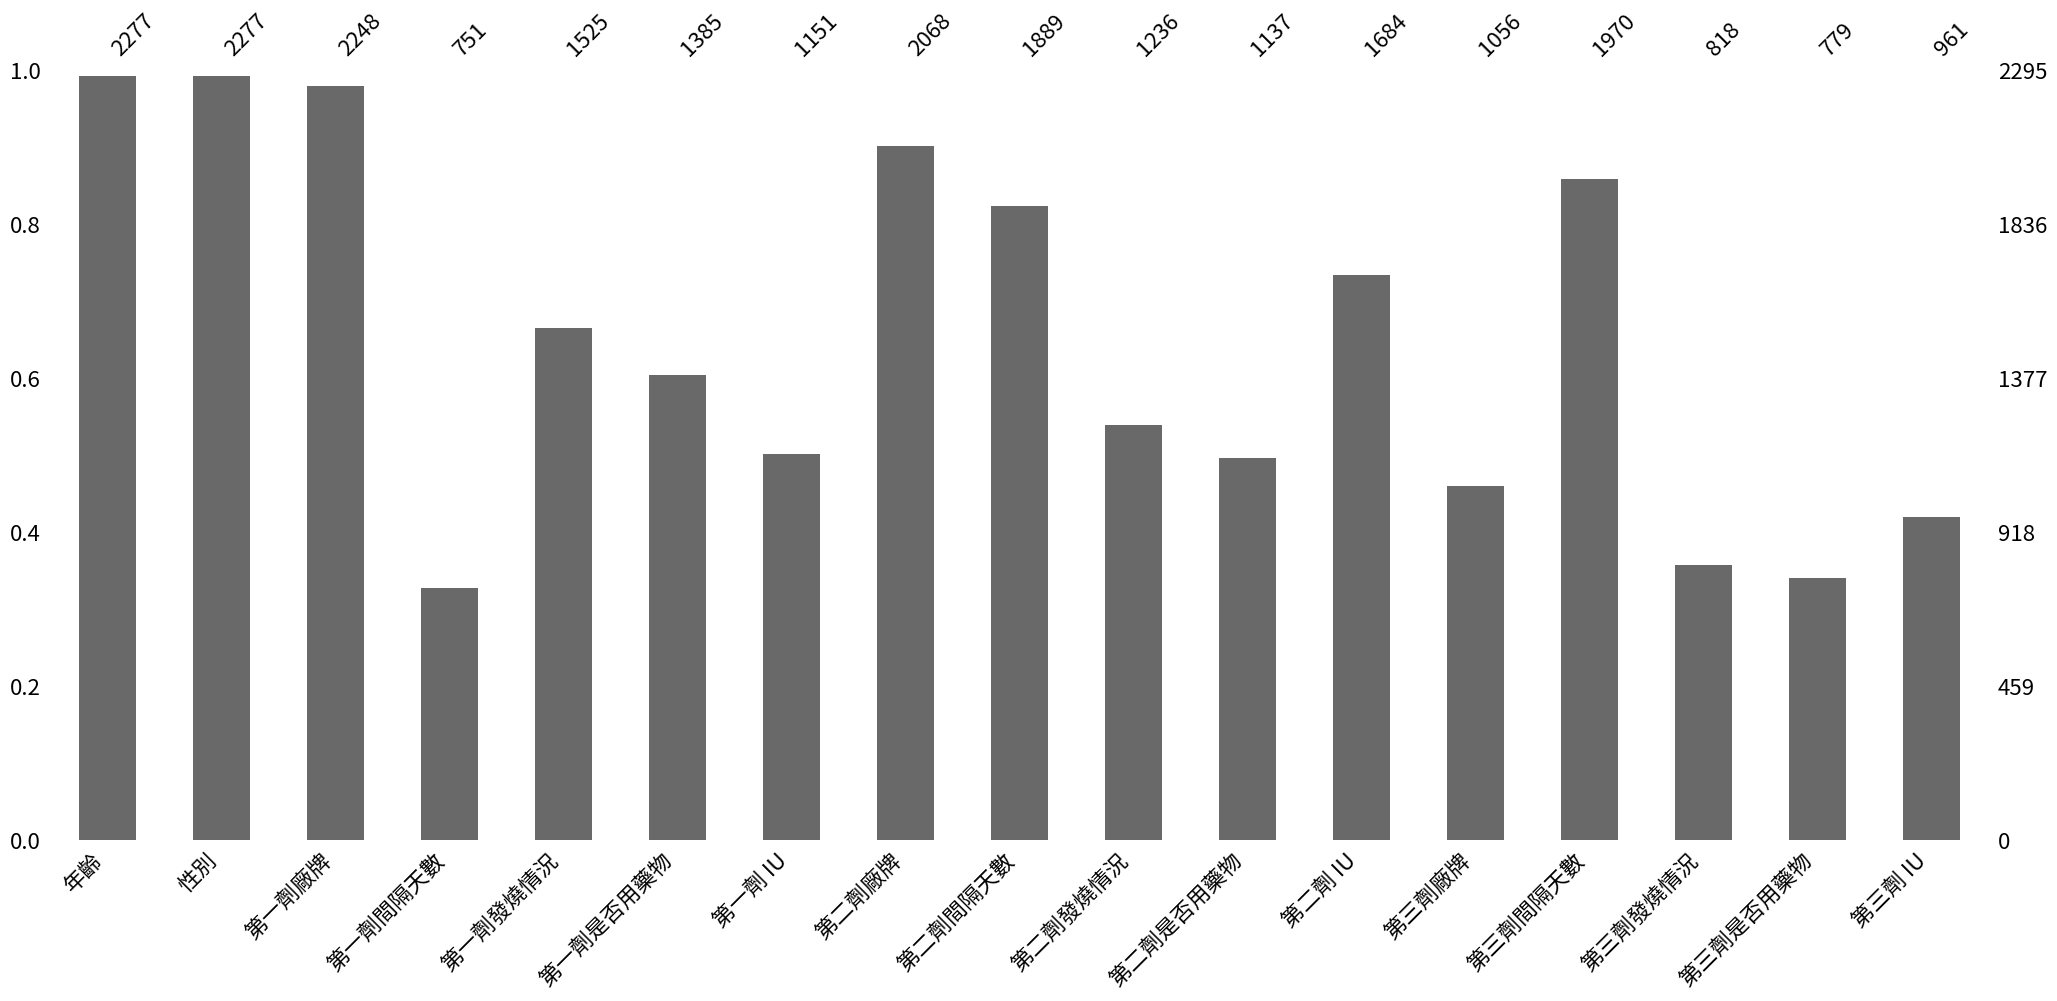

In [24]:
msno.bar(new_df) # 畫空值比圖密度圖

#missing value

In [ ]:
# 使用 chardet 檢測 CSV 文件的編碼方式
with open('/content/drive/MyDrive/test1.csv', 'rb') as f:
    result = chardet.detect(f.read())

# 印出檢測結果
#print(result)

# 使用檢測到的編碼方式讀取 CSV 文件
df = pd.read_csv('/content/drive/MyDrive/test1.csv', encoding=result['encoding'])
print("Data frame has {} rows and {} columns".format(df.shape[0],df.shape[1]))
df

Data frame has 2295 rows and 56 columns


,age,sex,blood type,Before-vaccination-MeDipro-predicted-IU,1-manufacturers,1-Days,1-fever,1-drug,1-predicted IU,2-manufacturers,...,氣喘,缺血性心臟病,惡性腫瘤,婦科疾病,肺結核,肺炎,接受過免疫抑制之療程?,其他慢性病,缺、未知.1,none
0,52,1,NaN,3.94,0,28,NaN,NaN,6.42,0,...,0,0,0,0,0,0,0,0,0,1
1,60,1,0.0,3.99,0,30,NaN,NaN,10.66,0,...,0,0,0,0,0,0,0,0,0,1
2,42,0,NaN,4.09,0,20,NaN,NaN,32.34,NaN,...,0,0,0,0,0,0,0,0,0,1
3,55,0,1.0,NaN,0,50,2,1,26.63,2,...,0,0,0,0,0,0,0,0,0,1
4,53,0,0.0,NaN,0,50,3,1,19.61,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,31,0,NaN,NaN,2,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,1,0
2291,21,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,0
2292,51,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,0
2293,44,0,NaN,NaN,0,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# 讓使用者輸入數字
user_input = input("請輸入數字 ：")

# 建立一個前綴列表，包含所有的數字前綴，除了使用者輸入的數字
prefixes = [str(i) + '-' for i in range(1, 6) if str(i) != user_input]

# 篩選出不包含這些前綴的欄位
selected_columns = [col for col in df.columns if all(prefix not in col for prefix in prefixes) and 'Before-vaccination-MeDipro-predicted-IU' not in col]
#selected_columns = [col for col in df.columns if user_input+"-" in col]
# 使用選擇的欄位創建新的DataFrame
new_df = df[selected_columns]
new_df = new_df.apply(lambda col: pd.to_numeric(col, errors='coerce')) # 將資料轉換為數字類型，錯誤的以NaN填入

# 移除包含NaN的資料列
new_df = new_df.dropna()
new_df_original = new_df.copy()
new_df

請輸入數字 ：3


,age,sex,blood type,3-manufacturers,3-Days,3-fever,3-drug,3-predicted IU,infection history,流感疫苗,...,氣喘,缺血性心臟病,惡性腫瘤,婦科疾病,肺結核,肺炎,接受過免疫抑制之療程?,其他慢性病,缺、未知.1,none
1,60.0,1.0,0.0,5.0,49.0,0.0,0.0,88.13,0.0,1,...,0,0,0,0,0,0,0,0,0,1
3,55.0,0.0,1.0,2.0,111.0,0.0,0.0,629.33,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,53.0,0.0,0.0,2.0,125.0,0.0,0.0,186.30,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18,49.0,0.0,2.0,2.0,122.0,0.0,0.0,417.35,0.0,1,...,0,0,0,0,0,0,0,0,0,1
74,26.0,0.0,0.0,1.0,54.0,0.0,0.0,679.41,0.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,61.0,1.0,1.0,2.0,63.0,0.0,0.0,413.20,0.0,1,...,0,0,0,0,0,0,0,0,0,0
968,61.0,1.0,1.0,2.0,63.0,0.0,0.0,413.20,0.0,1,...,0,0,0,0,0,0,0,0,0,0
969,61.0,1.0,1.0,2.0,63.0,0.0,0.0,413.20,0.0,1,...,0,0,0,0,0,0,0,0,0,0
970,45.0,0.0,2.0,1.0,45.0,0.0,0.0,445.07,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 設定要替換為 NaN 的比例
nan_ratio = 0.3

# 指定不填空的欄位的起始 index
start_index_to_exclude = 8

# 創建一個 mask，尺寸和 df 一樣大，並隨機生成布林值
mask = np.random.choice([True, False], size=new_df.shape, p=[nan_ratio, 1-nan_ratio])

# 將指定不填空的欄位標記為 False
mask[:, start_index_to_exclude:] = False

# 將 mask 為 True 的位置替換為 NaN
new_df[mask] = np.nan
new_df

,age,sex,blood type,3-manufacturers,3-Days,3-fever,3-drug,3-predicted IU,infection history,流感疫苗,...,氣喘,缺血性心臟病,惡性腫瘤,婦科疾病,肺結核,肺炎,接受過免疫抑制之療程?,其他慢性病,缺、未知.1,none
1,NaN,NaN,0.0,NaN,49.0,0.0,0.0,88.13,0.0,1,...,0,0,0,0,0,0,0,0,0,1
3,NaN,NaN,1.0,NaN,111.0,NaN,0.0,629.33,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,53.0,NaN,NaN,2.0,NaN,0.0,NaN,NaN,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18,NaN,0.0,2.0,2.0,122.0,0.0,NaN,417.35,0.0,1,...,0,0,0,0,0,0,0,0,0,1
74,26.0,0.0,0.0,1.0,54.0,NaN,0.0,679.41,0.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,NaN,NaN,NaN,NaN,63.0,0.0,0.0,NaN,0.0,1,...,0,0,0,0,0,0,0,0,0,0
968,NaN,1.0,NaN,NaN,63.0,NaN,0.0,413.20,0.0,1,...,0,0,0,0,0,0,0,0,0,0
969,NaN,1.0,1.0,2.0,NaN,NaN,0.0,413.20,0.0,1,...,0,0,0,0,0,0,0,0,0,0
970,NaN,NaN,2.0,1.0,45.0,0.0,0.0,445.07,0.0,1,...,0,0,0,0,0,0,0,0,0,0


Imputing row 1/273 with 3 missing, elapsed time: 0.025
Imputing row 101/273 with 5 missing, elapsed time: 0.032
Imputing row 201/273 with 0 missing, elapsed time: 0.040
Mean R^2 for mean:  0.9046359875910576
Mean R^2 for median:  0.8877942954311274
Mean R^2 for knn:  0.8967257743156521
Mean R^2 for mice:  0.9198561639056054


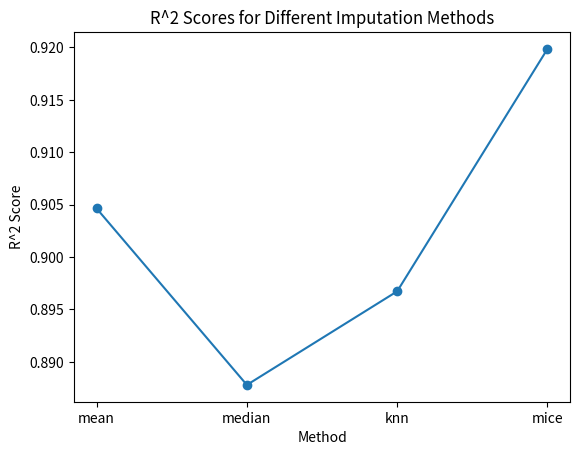

In [ ]:
#均值填補
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
x_missing_mean = imp_mean.fit_transform(new_df)

#中位數填補
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
x_missing_median = imp_median.fit_transform(new_df)

#KNN填補
x_missing_knn = np.array(new_df.copy()) # 含缺失值的數據
x_missing_knn = KNN(k=3).fit_transform(x_missing_knn)

#MICE填補
MICE_imputer = IterativeImputer()
x_missing_mice = new_df.copy(deep=True)
x_missing_mice = MICE_imputer.fit_transform(x_missing_mice)

# 將所有的模型或方法的預測結果存入一個字典中
predictions = {
    'mean': x_missing_mean,
    'median': x_missing_median,
    'knn': x_missing_knn,
    'mice': x_missing_mice
}

# 初始化一個字典來存儲結果
r2_scores = {}

# 對每一個模型或方法進行操作
for method, prediction in predictions.items():
    # 將數據轉換回 DataFrame，方便操作
    prediction_df = pd.DataFrame(prediction, columns=new_df.columns)

    # 初始化一個空列表來存儲結果
    #mse_results = []
    r2_results = []

    # 針對每一列進行操作
    for column in new_df.columns:
        # 只選取原本就是缺失值的位置
        original_values = new_df_original[mask]
        filled_values = prediction_df[mask]

        # 計算 R2 和 MSE，並將結果存儲到對應的列表中
        #mse_results.append(mean_squared_error(original_values, filled_values))
        r2_results.append(r2_score(original_values, filled_values))

    # 計算平均的 MSE 和 R^2
    #mean_mse = np.mean(mse_results)
    #mean_r2 = np.mean(r2_results)

    # 計算平均的 R^2，並將結果存儲到 r2_scores 字典中
    r2_scores[method] = np.mean(r2_results)

    #print(f"Mean MSE for {method}: ", mean_mse)
    print(f"Mean R^2 for {method}: ", np.mean(r2_results))

# 繪製折線圖
plt.plot(list(r2_scores.keys()), list(r2_scores.values()), marker='o')

# 為 x 軸和 y 軸添加標籤
plt.xlabel('Method')
plt.ylabel('R^2 Score')

# 添加標題
plt.title('R^2 Scores for Different Imputation Methods')

# 顯示圖表
plt.show()

In [ ]:
#r2_scores_lis = []
r2_scores_lis.append(r2_scores)

#missing value 1 to 3 一起

In [ ]:
# 使用 chardet 模塊來自動檢測CSV文件的編碼方式
import pandas as pd
import chardet

# 使用 chardet 檢測 CSV 文件的編碼方式
with open('/content/drive/MyDrive/1_3.csv', 'rb') as f:
    result = chardet.detect(f.read())

# 印出檢測結果
#print(result)

# 使用檢測到的編碼方式讀取 CSV 文件
new_df = pd.read_csv('/content/drive/MyDrive/1_3.csv', encoding=result['encoding'])
print("Data frame has {} rows and {} columns".format(new_df.shape[0],new_df.shape[1]))
new_df.head()

Data frame has 573 rows and 35 columns


,age,sex,blood type,1-3manufacturers,1-3Days,1-3fever,1-3drug,1-3predicted IU,infection history,流感疫苗,...,氣喘,缺血性心臟病,惡性腫瘤,婦科疾病,肺結核,肺炎,接受過免疫抑制之療程?,其他慢性病,缺、未知.1,none
0,55,0,1,0,50,2,1,26.63,1,0,...,0,0,0,0,0,0,0,0,0,1
1,53,0,0,0,50,3,1,19.61,0,1,...,0,0,0,0,0,0,0,0,0,1
2,49,0,2,0,53,3,0,232.06,0,1,...,0,0,0,0,0,0,0,0,0,1
3,26,0,0,5,30,0,0,7.37,0,0,...,0,0,0,0,0,0,0,0,0,1
4,25,1,3,0,49,2,0,19.87,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
new_df_original = new_df.copy()

# 設定要替換為 NaN 的比例
nan_ratio = 0.3

# 指定不填空的欄位的起始 index
start_index_to_exclude = 8

# 創建一個 mask，尺寸和 df 一樣大，並隨機生成布林值
mask = np.random.choice([True, False], size=new_df.shape, p=[nan_ratio, 1-nan_ratio])

# 將指定不填空的欄位標記為 False
mask[:, start_index_to_exclude:] = False

# 將 mask 為 True 的位置替換為 NaN
new_df[mask] = np.nan
new_df

,age,sex,blood type,1-3manufacturers,1-3Days,1-3fever,1-3drug,1-3predicted IU,infection history,流感疫苗,...,氣喘,缺血性心臟病,惡性腫瘤,婦科疾病,肺結核,肺炎,接受過免疫抑制之療程?,其他慢性病,缺、未知.1,none
0,55.0,0.0,1.0,NaN,50.0,2.0,NaN,26.63,1,0,...,0,0,0,0,0,0,0,0,0,1
1,53.0,NaN,0.0,0.0,NaN,NaN,1.0,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
2,49.0,NaN,2.0,NaN,53.0,3.0,NaN,232.06,0,1,...,0,0,0,0,0,0,0,0,0,1
3,26.0,0.0,NaN,5.0,30.0,0.0,0.0,7.37,0,0,...,0,0,0,0,0,0,0,0,0,1
4,25.0,NaN,3.0,0.0,49.0,NaN,0.0,19.87,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,NaN,NaN,1.0,2.0,63.0,0.0,0.0,413.20,0,1,...,0,0,0,0,0,0,0,0,0,0
569,NaN,1.0,1.0,2.0,63.0,0.0,0.0,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
570,61.0,1.0,NaN,2.0,63.0,0.0,0.0,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
571,45.0,0.0,NaN,1.0,45.0,0.0,0.0,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0


Imputing row 1/573 with 2 missing, elapsed time: 0.224
Imputing row 101/573 with 2 missing, elapsed time: 0.245
Imputing row 201/573 with 2 missing, elapsed time: 0.252
Imputing row 301/573 with 1 missing, elapsed time: 0.260
Imputing row 401/573 with 6 missing, elapsed time: 0.267
Imputing row 501/573 with 3 missing, elapsed time: 0.275
Mean R^2 for mean:  0.9112200663895752
Mean R^2 for median:  0.8909417345354468
Mean R^2 for knn:  0.9226520465960826
Mean R^2 for mice:  0.9185063450148278


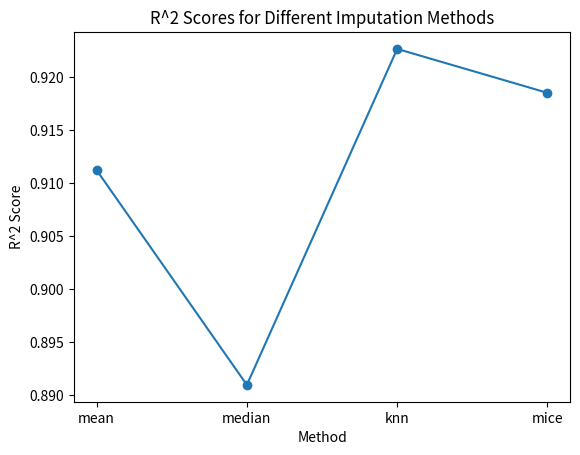

In [ ]:
#均值填補
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
x_missing_mean = imp_mean.fit_transform(new_df)

#中位數填補
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
x_missing_median = imp_median.fit_transform(new_df)

#KNN填補
x_missing_knn = np.array(new_df.copy()) # 含缺失值的數據
x_missing_knn = KNN(k=3).fit_transform(x_missing_knn)

#MICE填補
MICE_imputer = IterativeImputer()
x_missing_mice = new_df.copy(deep=True)
x_missing_mice = MICE_imputer.fit_transform(x_missing_mice)

# 將所有的模型或方法的預測結果存入一個字典中
predictions = {
    'mean': x_missing_mean,
    'median': x_missing_median,
    'knn': x_missing_knn,
    'mice': x_missing_mice
}

# 初始化一個字典來存儲結果
r2_scores = {}

# 對每一個模型或方法進行操作
for method, prediction in predictions.items():
    # 將數據轉換回 DataFrame，方便操作
    prediction_df = pd.DataFrame(prediction, columns=new_df.columns)

    # 初始化一個空列表來存儲結果
    #mse_results = []
    r2_results = []

    # 針對每一列進行操作
    for column in new_df.columns:
        # 只選取原本就是缺失值的位置
        original_values = new_df_original[mask]
        filled_values = prediction_df[mask]

        # 計算 R2 和 MSE，並將結果存儲到對應的列表中
        #mse_results.append(mean_squared_error(original_values, filled_values))
        r2_results.append(r2_score(original_values, filled_values))

    # 計算平均的 MSE 和 R^2
    #mean_mse = np.mean(mse_results)
    #mean_r2 = np.mean(r2_results)

    # 計算平均的 R^2，並將結果存儲到 r2_scores 字典中
    r2_scores[method] = np.mean(r2_results)

    #print(f"Mean MSE for {method}: ", mean_mse)
    print(f"Mean R^2 for {method}: ", np.mean(r2_results))

# 繪製折線圖
plt.plot(list(r2_scores.keys()), list(r2_scores.values()), marker='o')

# 為 x 軸和 y 軸添加標籤
plt.xlabel('Method')
plt.ylabel('R^2 Score')

# 添加標題
plt.title('R^2 Scores for Different Imputation Methods')

# 顯示圖表
plt.show()

In [ ]:
r2_scores_lis.append(r2_scores)
r2_scores_lis

[{'mean': 0.9113931030179462,
  'median': 0.893931868227486,
  'knn': 0.9525967350341744,
  'mice': 0.9095791212364918},
 {'mean': 0.9098749812391532,
  'median': 0.8845695684528618,
  'knn': 0.9119393347273994,
  'mice': 0.916186910993005},
 {'mean': 0.9046359875910576,
  'median': 0.8877942954311274,
  'knn': 0.8967257743156521,
  'mice': 0.9198561639056054},
 {'mean': 0.9112200663895752,
  'median': 0.8909417345354468,
  'knn': 0.9226520465960826,
  'mice': 0.9185063450148278}]

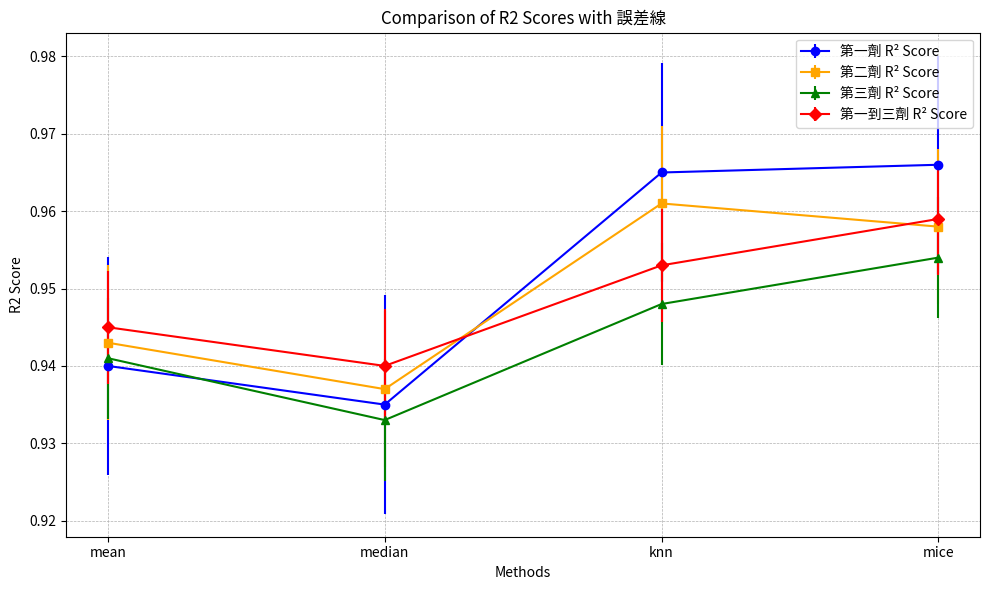

In [72]:
# 資料準備
r2_scores_lis = [{'mean': 0.940, 'median': 0.935, 'knn': 0.965, 'mice': 0.966},
                 {'mean': 0.943, 'median': 0.937, 'knn': 0.961, 'mice': 0.958},
                 {'mean': 0.941, 'median': 0.933, 'knn': 0.948, 'mice': 0.954},
                 {'mean': 0.945, 'median': 0.940, 'knn': 0.953, 'mice': 0.959}]

r2_scores_one = r2_scores_lis[0]
r2_scores_two = r2_scores_lis[1]
r2_scores_three = r2_scores_lis[2]
r2_scores_four = r2_scores_lis[3]

methods = list(r2_scores_one.keys())
scores_one = list(r2_scores_one.values())
scores_two = list(r2_scores_two.values())
scores_three = list(r2_scores_three.values())
scores_four = list(r2_scores_four.values())

# 計算標準差
std_dev_one = np.std(scores_one)
std_dev_two = np.std(scores_two)
std_dev_three = np.std(scores_three)
std_dev_four = np.std(scores_four)

# 計算誤差值
error_one = [std_dev_one] * len(methods)
error_two = [std_dev_two] * len(methods)
error_three = [std_dev_three] * len(methods)
error_four = [std_dev_four] * len(methods)

# 畫圖
plt.figure(figsize=(10, 6))

# 第一劑 R² Score
plt.errorbar(methods, scores_one, yerr=error_one, fmt='-o', color='blue', label='第一劑 R² Score')

# 第二劑 R² Score
plt.errorbar(methods, scores_two, yerr=error_two, fmt='-s', color='orange', label='第二劑 R² Score')

# 第三劑 R² Score
plt.errorbar(methods, scores_three, yerr=error_three, fmt='-^', color='green', label='第三劑 R² Score')

# 第一到三劑 R² Score
plt.errorbar(methods, scores_four, yerr=error_four, fmt='-D', color='red', label='第一到三劑 R² Score')

plt.title('Comparison of R2 Scores with 誤差線')
plt.xlabel('Methods')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [71]:
# 印出誤差值
error_one = [std_dev_one] * len(methods)
error_two = [std_dev_two] * len(methods)
error_three = [std_dev_three] * len(methods)
error_four = [std_dev_four] * len(methods)
print(f"{error_one[0]:.3f},{error_two[0]:.3f},{error_three[0]:.3f},{error_four[0]:.3f}")

0.014,0.010,0.008,0.007


#KNN填補後

In [6]:
# 使用 chardet 檢測 CSV 文件的編碼方式
with open('/content/drive/MyDrive/test1.csv', 'rb') as f:
    result = chardet.detect(f.read())

# 印出檢測結果
#print(result)

# 使用檢測到的編碼方式讀取 CSV 文件
df = pd.read_csv('/content/drive/MyDrive/test1.csv', encoding=result['encoding'])

# 挑選出不含"4-"和"5-"的欄位名稱
#selected_columns = [col for col in df.columns if '4-' not in col and '5-' not in col and 'Before-vaccination-MeDipro-predicted-IU' not in col]
selected_df = df[['age', 'sex',
       '1-manufacturers', '1-Days', '1-fever', '1-drug', '1-predicted IU',
       '2-manufacturers', '2-Days', '2-fever', '2-drug', '2-predicted IU',
       '3-manufacturers', '3-Days', '3-fever', '3-drug', '3-predicted IU']]
# 使用選擇的欄位創建新的DataFrame
#new_df = df[selected_columns]
new_df = selected_df
new_df

,age,sex,1-manufacturers,1-Days,1-fever,1-drug,1-predicted IU,2-manufacturers,2-Days,2-fever,2-drug,2-predicted IU,3-manufacturers,3-Days,3-fever,3-drug,3-predicted IU
0,52,1,0,28,NaN,NaN,6.42,0,17.0,0.0,0.0,185.25,2,198.0,NaN,NaN,178.74
1,60,1,0,30,NaN,NaN,10.66,0,20.0,0.0,0.0,152.9,5,49.0,0,0,88.13
2,42,0,0,20,NaN,NaN,32.34,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,55,0,0,50,2,1,26.63,2,28.0,2.0,0.0,1165.26,2,111.0,0,0,629.33
4,53,0,0,50,3,1,19.61,0,59.0,0.0,0.0,15.22,2,125.0,0,0,186.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,31,0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,1,67.0,NaN,NaN,475.60
2291,21,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,5,39.0,NaN,NaN,164.54
2292,51,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,98.0,NaN,NaN,767.81
2293,44,0,0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,105.0,NaN,NaN,1041.05


In [7]:
cleaned_df = new_df.replace('\u3000', np.nan) # \u3000 = 空格

bins = [0, 19, 29, 39, 49, 59, 69, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7]

# 使用 cut 函數來根據年齡的區間區分生命階段並直接替換原始的 'age' 欄位
cleaned_df['age'] = cleaned_df['age'].astype(float) # 轉換成float
cleaned_df['age'] = pd.cut(cleaned_df['age'], bins=bins, labels=labels, right=True)

# 進行運算，四捨五入
cleaned_df['1-predicted IU'] = cleaned_df['1-predicted IU'].astype(float) # 轉換成float
cleaned_df['1-predicted IU'] = round(np.log2(cleaned_df['1-predicted IU'] / 40))
cleaned_df['2-predicted IU'] = cleaned_df['2-predicted IU'].astype(float) # 轉換成float
cleaned_df['2-predicted IU'] = round(np.log2(cleaned_df['2-predicted IU'] / 40))
cleaned_df['3-predicted IU'] = cleaned_df['3-predicted IU'].astype(float) # 轉換成float
cleaned_df['3-predicted IU'] = round(np.log2(cleaned_df['3-predicted IU'] / 40))

In [8]:
# Identify columns with string values
string_columns = cleaned_df.select_dtypes(include=['object']).columns

# Create a dictionary to store label encoders for each column
label_encoders = {}

# Apply label encoding to each column with string values
for col in string_columns:
    label_encoder = LabelEncoder()
    cleaned_df[col] = label_encoder.fit_transform(cleaned_df[col])
    label_encoders[col] = label_encoder

# Now, use KNNImputer to fill missing values
knn_imputer = KNNImputer(n_neighbors=5)
cleaned_df = knn_imputer.fit_transform(cleaned_df)

In [9]:
# Assuming cleaned_df is a NumPy array
cleaned_df = pd.DataFrame(cleaned_df, columns=new_df.columns)

In [10]:
cleaned_df = cleaned_df.astype(float) # 轉換成float

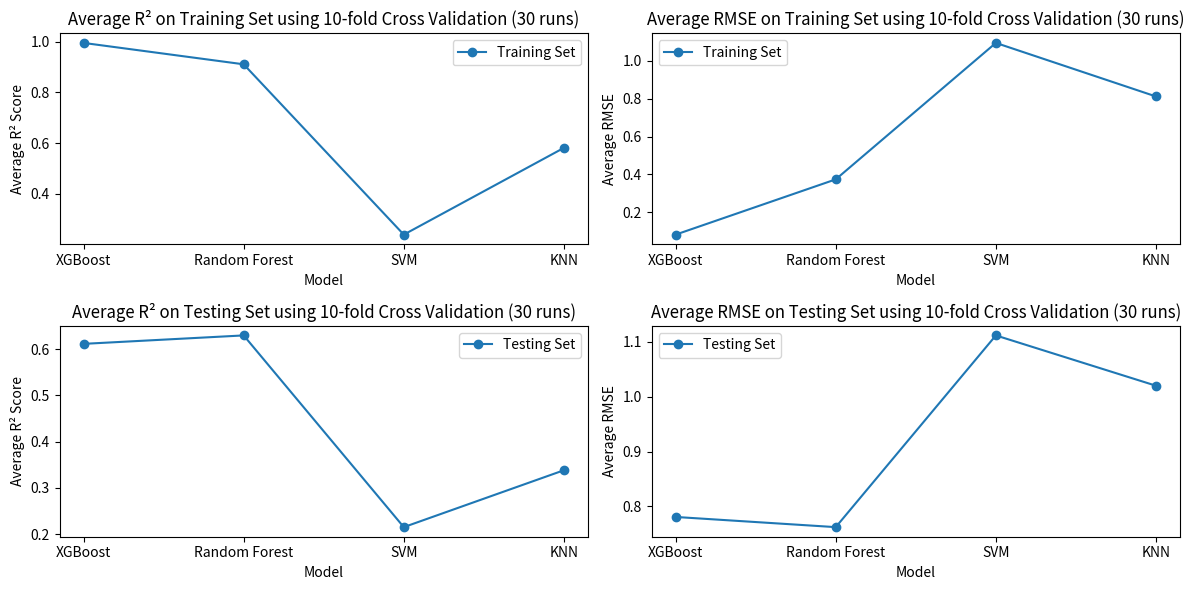

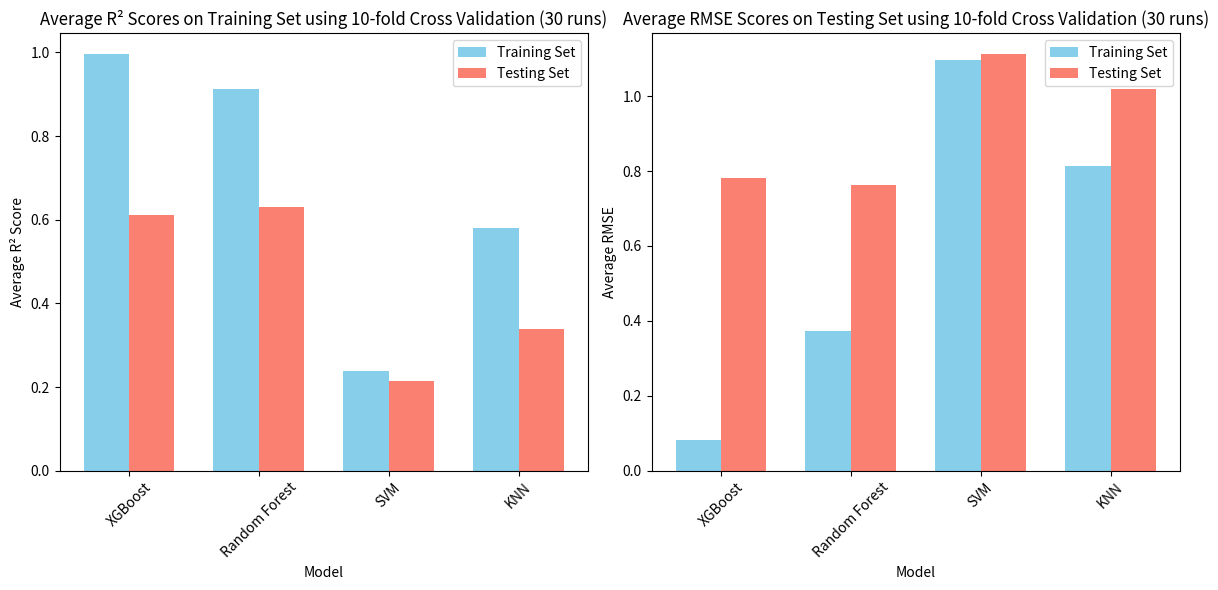

In [18]:
# 定義特徵和目標變量
X = cleaned_df.drop(columns=['3-predicted IU'])
Y = cleaned_df['3-predicted IU']

# 定義模型
xgb_model = xgboost.XGBRegressor(
    learning_rate=0.1,  # 學習速率
    n_estimators=100,   # 樹的數量
    max_depth=10,       # 樹的最大深度
    subsample=0.8,      # 子樣本比例
    colsample_bytree=0.8,  # 每棵樹的特徵採樣比例
    random_state=42     # 隨機種子
)
rf_model = RandomForestRegressor(
    n_estimators=100,   # 樹的數量
    max_depth=10,       # 樹的最大深度
    min_samples_split=2,  # 內部節點再劃分所需的最小樣本數
    min_samples_leaf=1,   # 葉子節點所需的最小樣本數
    random_state=42     # 隨機種子
)
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
knn_model = KNeighborsRegressor(n_neighbors=5)

models = {
    'XGBoost': xgb_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model
}

# 初始化存儲分數和預測結果的字典
r2_scores_train = {name: [] for name in models.keys()}
rmse_scores_train = {name: [] for name in models.keys()}
r2_scores_test = {name: [] for name in models.keys()}
rmse_scores_test = {name: [] for name in models.keys()}
predictions_all = {name: [] for name in models.keys()}
y_test_all = []

# 進行30次模型運行
for run in range(30):
    # 使用ShuffleSplit進行交叉驗證
    kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=run)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        for name, model in models.items():
            # 訓練模型
            model.fit(X_train, Y_train)

            # 對訓練集進行預測
            predictions_train = model.predict(X_train)

            # 對測試集進行預測
            predictions_test = model.predict(X_test)

            # 計算訓練集和測試集的R²和RMSE
            r2_scores_train[name].append(r2_score(Y_train, predictions_train))
            rmse_scores_train[name].append(mean_squared_error(Y_train, predictions_train, squared=False))
            r2_scores_test[name].append(r2_score(Y_test, predictions_test))
            rmse_scores_test[name].append(mean_squared_error(Y_test, predictions_test, squared=False))

            # 存儲所有預測結果和實際值以供比較
            predictions_all[name].extend(predictions_test)

        # 儲存測試集實際值
        y_test_all.extend(Y_test)

# 計算訓練集和測試集R²和RMSE的平均值
mean_r2_scores_train = {name: np.mean(scores) for name, scores in r2_scores_train.items()}
mean_rmse_scores_train = {name: np.mean(scores) for name, scores in rmse_scores_train.items()}
mean_r2_scores_test = {name: np.mean(scores) for name, scores in r2_scores_test.items()}
mean_rmse_scores_test = {name: np.mean(scores) for name, scores in rmse_scores_test.items()}

# 繪製R²和RMSE分數的折線圖
plt.figure(figsize=(12, 6))

# Plot average R² scores line plot for training set
plt.subplot(2, 2, 1)
plt.plot(list(mean_r2_scores_train.keys()), list(mean_r2_scores_train.values()), marker='o', label='Training Set')
plt.title('Average R² on Training Set using 10-fold Cross Validation (30 runs)')
plt.xlabel('Model')
plt.ylabel('Average R² Score')
plt.legend()

# Plot average RMSE scores line plot for training set
plt.subplot(2, 2, 2)
plt.plot(list(mean_rmse_scores_train.keys()), list(mean_rmse_scores_train.values()), marker='o', label='Training Set')
plt.title('Average RMSE on Training Set using 10-fold Cross Validation (30 runs)')
plt.xlabel('Model')
plt.ylabel('Average RMSE')
plt.legend()

# Plot average R² scores line plot for testing set
plt.subplot(2, 2, 3)
plt.plot(list(mean_r2_scores_test.keys()), list(mean_r2_scores_test.values()), marker='o', label='Testing Set')
plt.title('Average R² on Testing Set using 10-fold Cross Validation (30 runs)')
plt.xlabel('Model')
plt.ylabel('Average R² Score')
plt.legend()

# Plot average RMSE scores line plot for testing set
plt.subplot(2, 2, 4)
plt.plot(list(mean_rmse_scores_test.keys()), list(mean_rmse_scores_test.values()), marker='o', label='Testing Set')
plt.title('Average RMSE on Testing Set using 10-fold Cross Validation (30 runs)')
plt.xlabel('Model')
plt.ylabel('Average RMSE')
plt.legend()

plt.tight_layout()
plt.show()

# 繪製平均 R² 和 RMSE 分數的直方圖
plt.figure(figsize=(12, 6))

# Plot average R² scores histogram
plt.subplot(1, 2, 1)
bar_width = 0.35
index = np.arange(len(mean_r2_scores_train))
plt.bar(index, mean_r2_scores_train.values(), bar_width, label='Training Set', color='skyblue')
plt.bar(index + bar_width, mean_r2_scores_test.values(), bar_width, label='Testing Set', color='salmon')
plt.title('Average R² Scores on Training Set using 10-fold Cross Validation (30 runs)')
plt.xlabel('Model')
plt.ylabel('Average R² Score')
plt.xticks(index + bar_width / 2, mean_r2_scores_train.keys(), rotation=45)
plt.legend()

# Plot average RMSE scores histogram
plt.subplot(1, 2, 2)
plt.bar(index, mean_rmse_scores_train.values(), bar_width, label='Training Set', color='skyblue')
plt.bar(index + bar_width, mean_rmse_scores_test.values(), bar_width, label='Testing Set', color='salmon')
plt.title('Average RMSE Scores on Testing Set using 10-fold Cross Validation (30 runs)')
plt.xlabel('Model')
plt.ylabel('Average RMSE')
plt.xticks(index + bar_width / 2, mean_rmse_scores_train.keys(), rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
print("r2_scores_train : ",mean_r2_scores_train)
print("mean_rmse_scores_train : ",mean_rmse_scores_train)
print("mean_r2_scores_test : ",mean_r2_scores_test)
print("mean_rmse_scores_test : ",mean_rmse_scores_test)

r2_scores_train :  {'XGBoost': 0.9957761916514649, 'Random Forest': 0.9113159517993165, 'SVM': 0.23854260302557273, 'KNN': 0.5812837472145501}
mean_rmse_scores_train :  {'XGBoost': 0.08144620656845789, 'Random Forest': 0.37371033938772136, 'SVM': 1.095323605049642, 'KNN': 0.8121544994431706}
mean_r2_scores_test :  {'XGBoost': 0.61156268461296, 'Random Forest': 0.6298189852228354, 'SVM': 0.21524811082348758, 'KNN': 0.33827526698722277}
mean_rmse_scores_test :  {'XGBoost': 0.7808173287670565, 'Random Forest': 0.7622426214348149, 'SVM': 1.111971848006045, 'KNN': 1.0202088408851246}


#MICE填補後

In [32]:
# 使用 chardet 檢測 CSV 文件的編碼方式
with open('/content/drive/MyDrive/test1.csv', 'rb') as f:
    result = chardet.detect(f.read())

# 印出檢測結果
#print(result)

# 使用檢測到的編碼方式讀取 CSV 文件
df = pd.read_csv('/content/drive/MyDrive/test1.csv', encoding=result['encoding'])

# 挑選出不含"4-"和"5-"的欄位名稱
#selected_columns = [col for col in df.columns if '4-' not in col and '5-' not in col and 'Before-vaccination-MeDipro-predicted-IU' not in col]
selected_df = df[['age', 'sex',
       '1-manufacturers', '1-Days', '1-fever', '1-drug', '1-predicted IU',
       '2-manufacturers', '2-Days', '2-fever', '2-drug', '2-predicted IU',
       '3-manufacturers', '3-Days', '3-fever', '3-drug', '3-predicted IU']]
# 使用選擇的欄位創建新的DataFrame
#new_df = df[selected_columns]
new_df = selected_df
new_df

,age,sex,1-manufacturers,1-Days,1-fever,1-drug,1-predicted IU,2-manufacturers,2-Days,2-fever,2-drug,2-predicted IU,3-manufacturers,3-Days,3-fever,3-drug,3-predicted IU
0,52,1,0,28,NaN,NaN,6.42,0,17.0,0.0,0.0,185.25,2,198.0,NaN,NaN,178.74
1,60,1,0,30,NaN,NaN,10.66,0,20.0,0.0,0.0,152.9,5,49.0,0,0,88.13
2,42,0,0,20,NaN,NaN,32.34,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,55,0,0,50,2,1,26.63,2,28.0,2.0,0.0,1165.26,2,111.0,0,0,629.33
4,53,0,0,50,3,1,19.61,0,59.0,0.0,0.0,15.22,2,125.0,0,0,186.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,31,0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,1,67.0,NaN,NaN,475.60
2291,21,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,5,39.0,NaN,NaN,164.54
2292,51,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,98.0,NaN,NaN,767.81
2293,44,0,0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,105.0,NaN,NaN,1041.05


In [33]:
cleaned_df = new_df.replace('\u3000', np.nan) # \u3000 = 空格

bins = [0, 19, 29, 39, 49, 59, 69, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7]

# 使用 cut 函數來根據年齡的區間區分生命階段並直接替換原始的 'age' 欄位
cleaned_df['age'] = cleaned_df['age'].astype(float) # 轉換成float
cleaned_df['age'] = pd.cut(cleaned_df['age'], bins=bins, labels=labels, right=True)

# 進行運算，四捨五入
cleaned_df['1-predicted IU'] = cleaned_df['1-predicted IU'].astype(float) # 轉換成float
cleaned_df['1-predicted IU'] = round(np.log2(cleaned_df['1-predicted IU'] / 40))
cleaned_df['2-predicted IU'] = cleaned_df['2-predicted IU'].astype(float) # 轉換成float
cleaned_df['2-predicted IU'] = round(np.log2(cleaned_df['2-predicted IU'] / 40))
cleaned_df['3-predicted IU'] = cleaned_df['3-predicted IU'].astype(float) # 轉換成float
cleaned_df['3-predicted IU'] = round(np.log2(cleaned_df['3-predicted IU'] / 40))

In [34]:
# Identify columns with string values
string_columns = cleaned_df.select_dtypes(include=['object']).columns

# Create a dictionary to store label encoders for each column
label_encoders = {}

# Apply label encoding to each column with string values
for col in string_columns:
    label_encoder = LabelEncoder()
    cleaned_df[col] = label_encoder.fit_transform(cleaned_df[col])
    label_encoders[col] = label_encoder

# Use IterativeImputer to fill missing values (MICE)
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
cleaned_df = mice_imputer.fit_transform(cleaned_df)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [35]:
# Assuming cleaned_df is a NumPy array
cleaned_df = pd.DataFrame(cleaned_df, columns=new_df.columns)

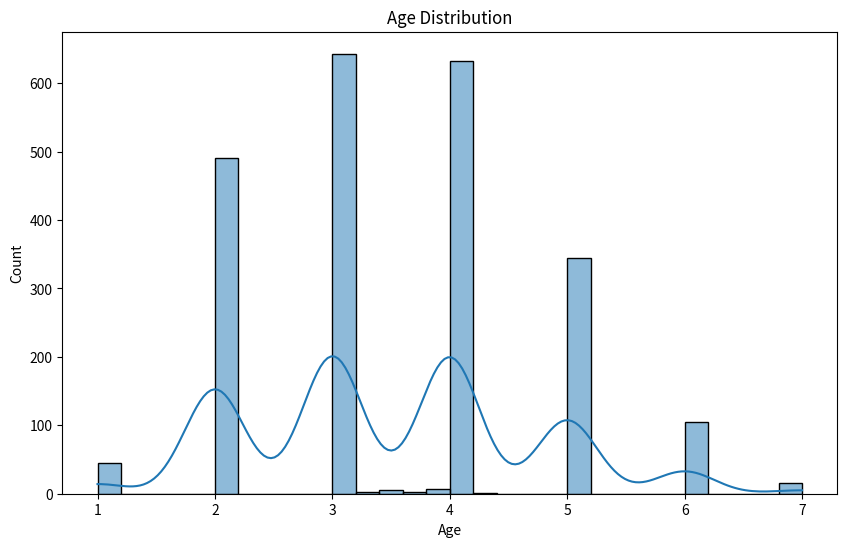

In [ ]:
# 使用seaborn繪製年齡分布圖
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

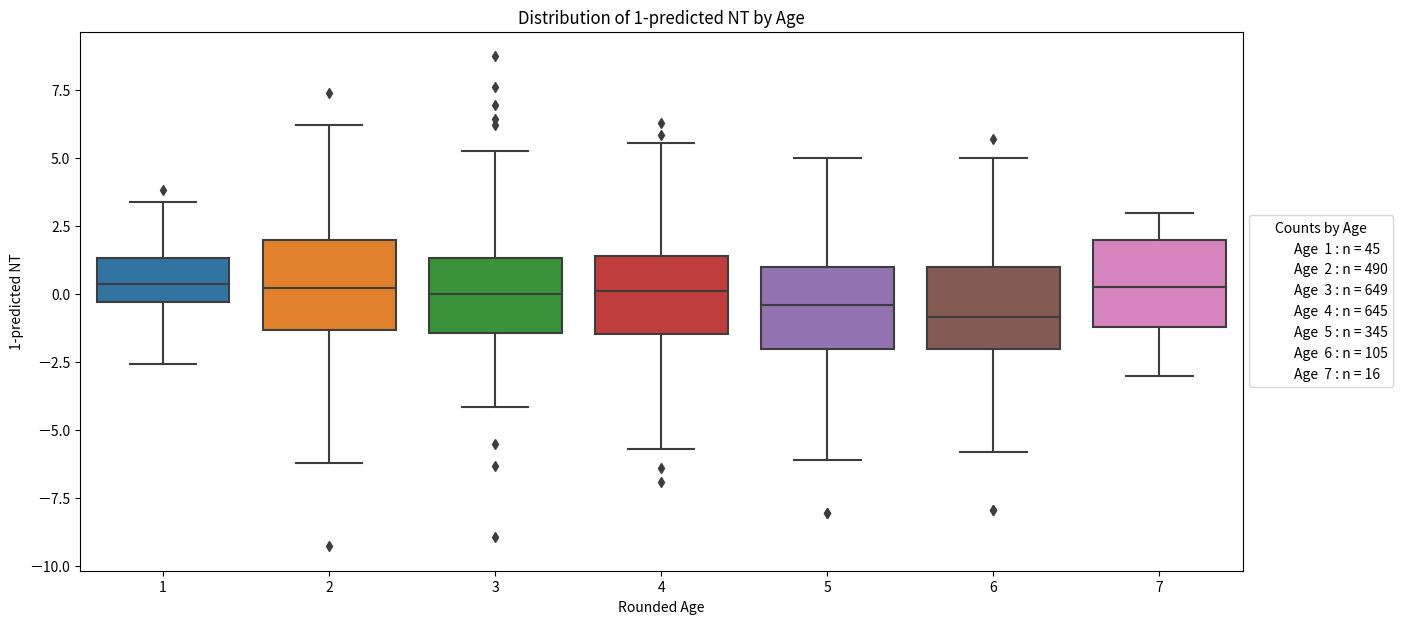

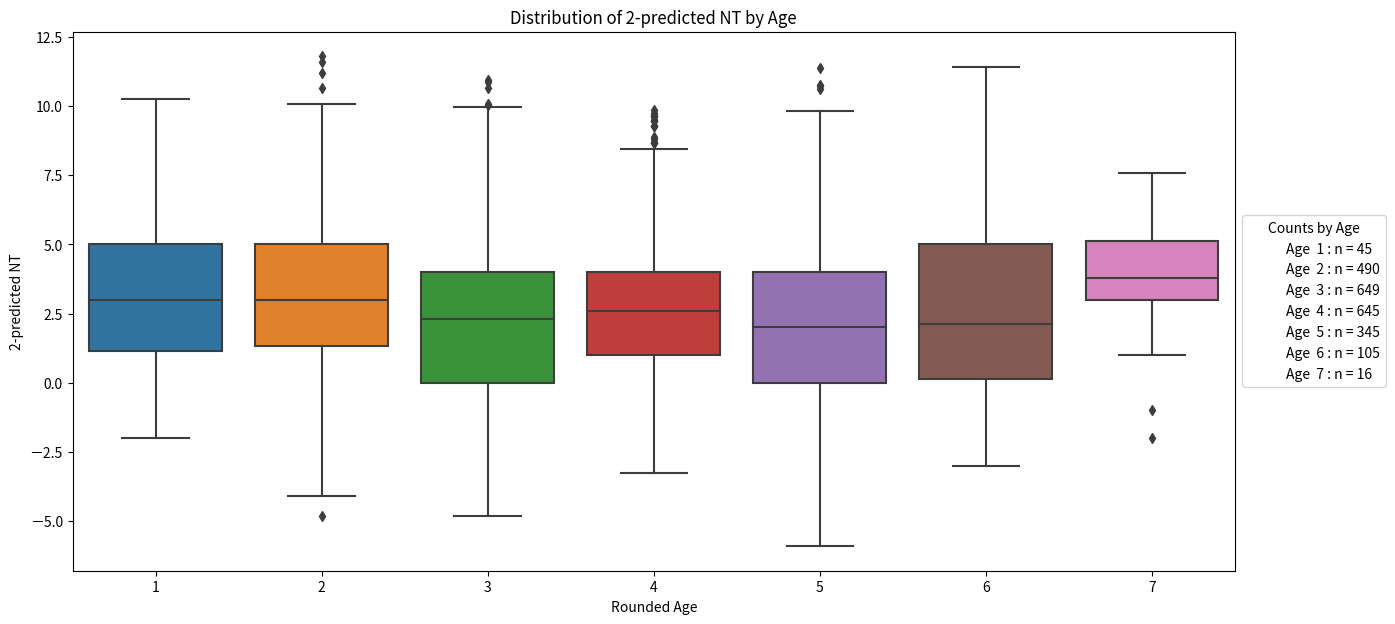

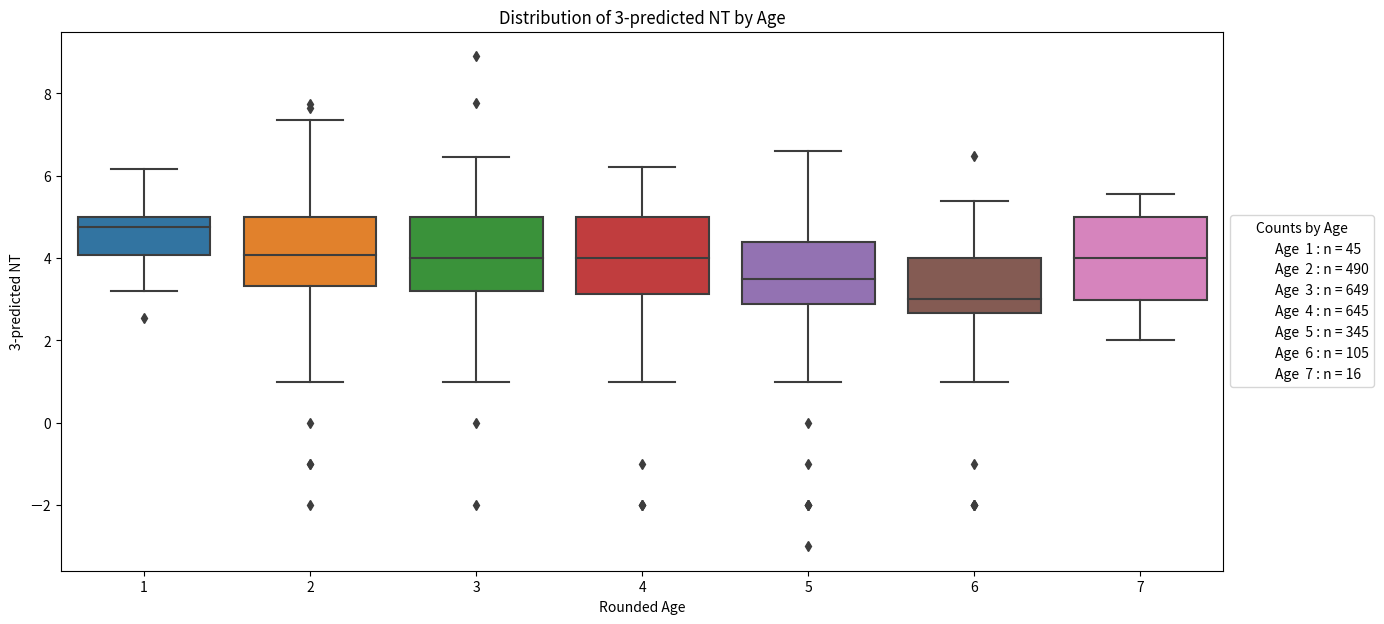

In [ ]:
for i in range(1, 4):
    plt.figure(figsize=(15, 7))
    # Round the age values to the nearest integer
    cleaned_df['rounded_age'] = cleaned_df['age'].round().astype(int)
    ax = sns.boxplot(x=cleaned_df['rounded_age'], y=cleaned_df[f'{i}-predicted IU'], showfliers=True)

    # 為每個盒子計算點的數量
    age_counts = cleaned_df['rounded_age'].value_counts().sort_index()

    # 創建一個存儲legend labels的空列表
    legend_labels = []

    # 獲取每個年齡的數量並將其添加到legend_labels列表中
    for age, count in age_counts.items():
        label = f"Age {age:2} : n = {count}"
        legend_labels.append(label)

    # 使用手工添加圖例的方法，並刪除圖例的顏色
    legend_elements = [plt.Line2D([0], [0], color='white', label=legend_label) for legend_label in legend_labels]
    # 使用 `loc` 和 `bbox_to_anchor` 將圖例放在右側框線外
    ax.legend(handles=legend_elements, title="Counts by Age", loc="center left", bbox_to_anchor=(1, 0.5))

    plt.title(f'Distribution of {i}-predicted NT by Age')
    plt.ylabel(f'{i}-predicted NT')
    plt.xlabel('Rounded Age')
    plt.show()

# Remove the temporary 'rounded_age' column
cleaned_df = cleaned_df.drop('rounded_age', axis=1)

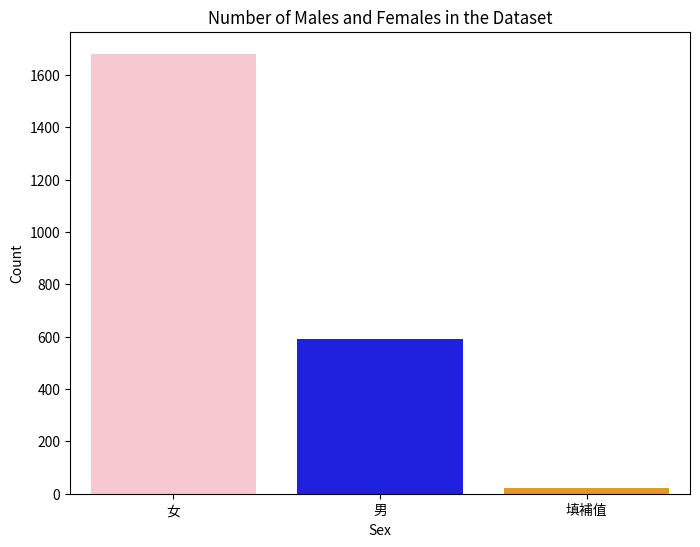

In [ ]:
# 創建一個新的 DataFrame 作為 cleaned_df 的副本
new_df = cleaned_df.copy()

# 對新的 DataFrame 進行操作
new_df['sex'] = new_df['sex'].replace({0.0: '女', 1.0: '男', 2.0:'填補值'})

# 定義性別與顏色的對應
color_map = {'男': 'blue', '女': 'pink' ,'填補值':'orange'}

# 計算男女各自的數量
sex_counts = new_df['sex'].value_counts()

# 繪製柱狀圖
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=color_map)

# 設定圖片標題和軸標籤
plt.title('Number of Males and Females in the Dataset')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



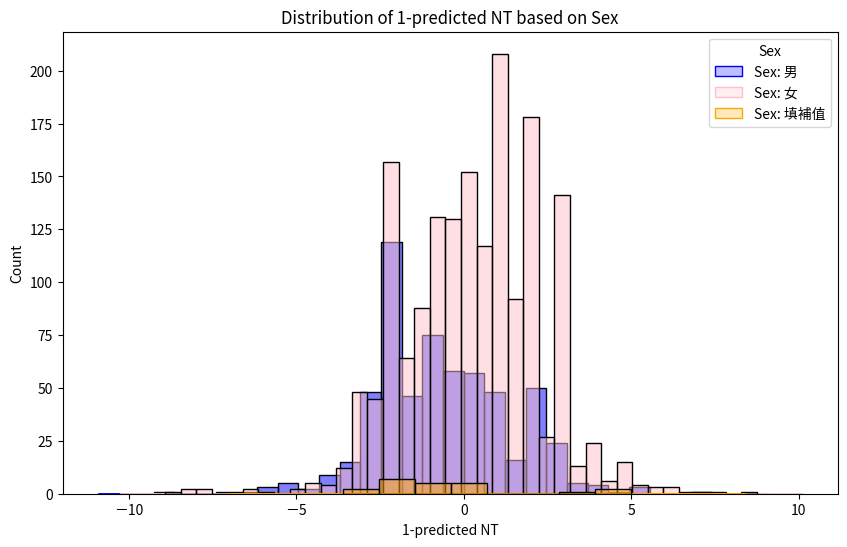



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



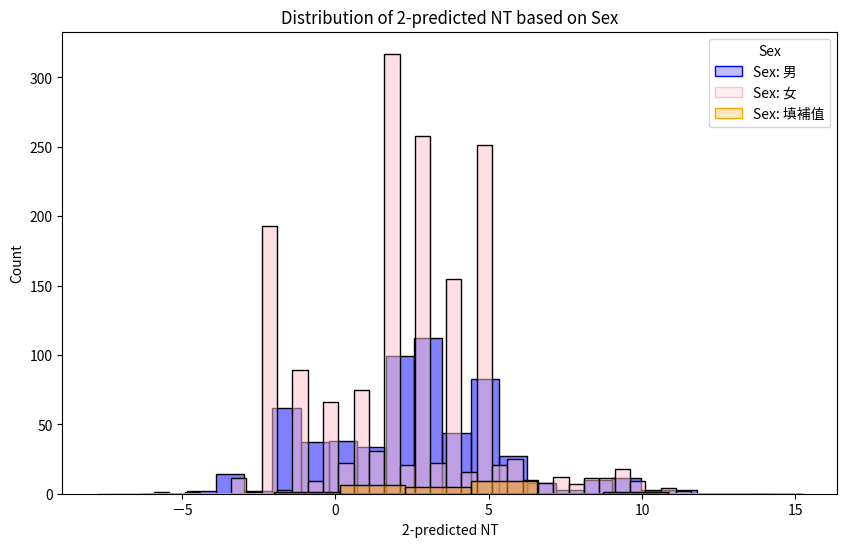



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



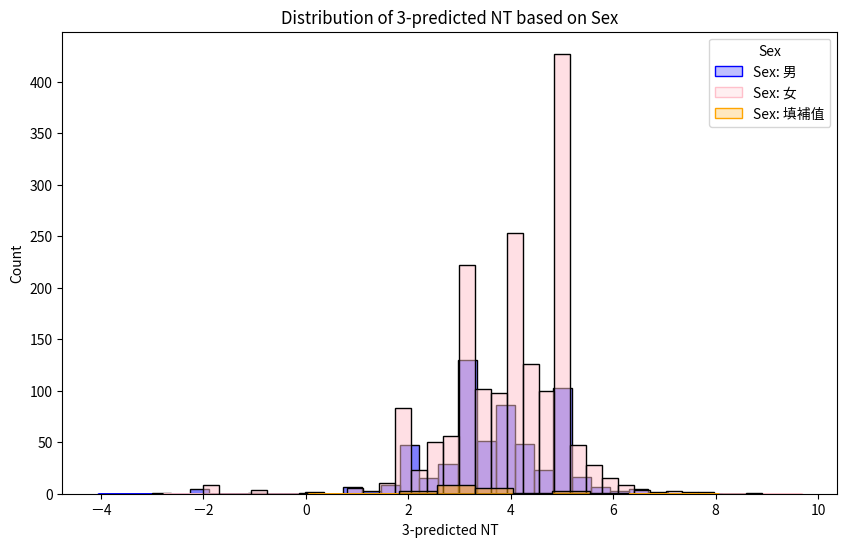

In [ ]:
# 將 'sex' 欄位中的值從 0 和 1 轉換為 '女' 和 '男'
# 創建一個新的 DataFrame 作為 cleaned_df 的副本

for i in range(1,4):
  new_df = cleaned_df.copy()
  new_df.dropna(subset=[f'{i}-predicted IU'], inplace=True)
  new_df.dropna(subset=['sex'], inplace=True)

  # 對新的 DataFrame 進行操作
  new_df['sex'] = new_df['sex'].replace({0: '女', 1: '男', 2:'填補值'})

  # 定義性別與顏色的對應
  color_map = {'男': 'blue', '女': 'pink', '填補值':'orange'}

  # 使用kdeplot繪製密度曲線
  plt.figure(figsize=(10, 6))

  # 為男性和女性分別劃出直方圖和密度曲線
  for sex_value in new_df['sex'].unique():
      subset = new_df[new_df['sex'] == sex_value]
      sns.kdeplot(subset[f'{i}-predicted IU'], label=f'Sex: {sex_value}', shade=True, color=color_map[sex_value])
      sns.histplot(subset[f'{i}-predicted IU'], kde=False, alpha=0.5, color=color_map[sex_value],stat="count")

  plt.title(f'Distribution of {i}-predicted NT based on Sex')
  plt.xlabel(f'{i}-predicted NT')
  plt.ylabel('Count')
  plt.legend(title='Sex')
  plt.show()

In [36]:
cleaned_df = cleaned_df.astype(float) # 轉換成float

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

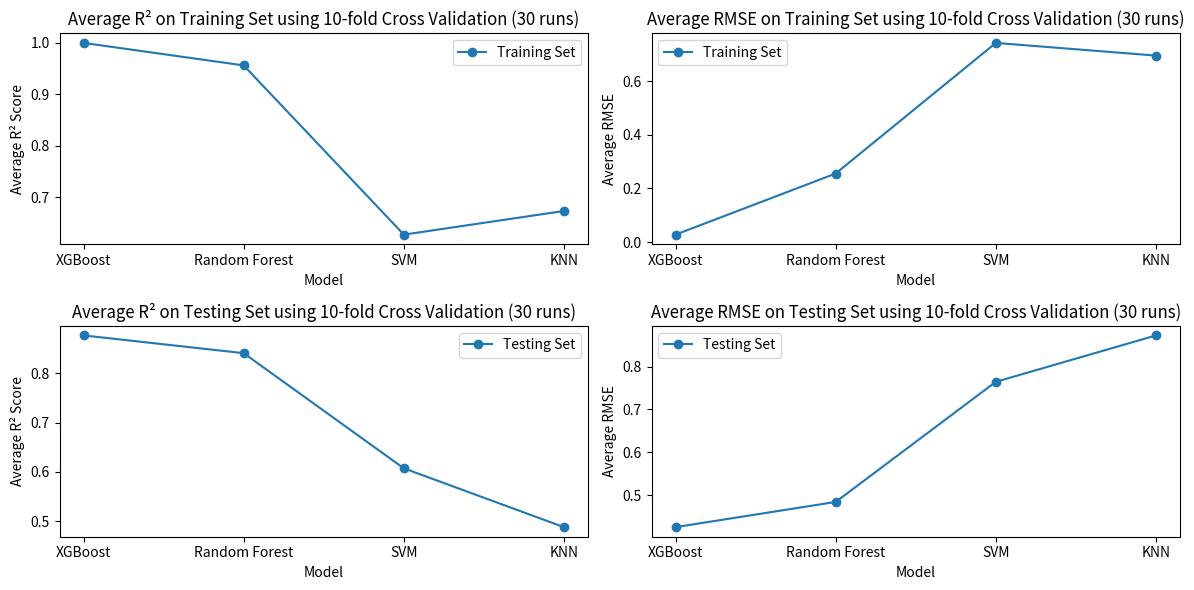

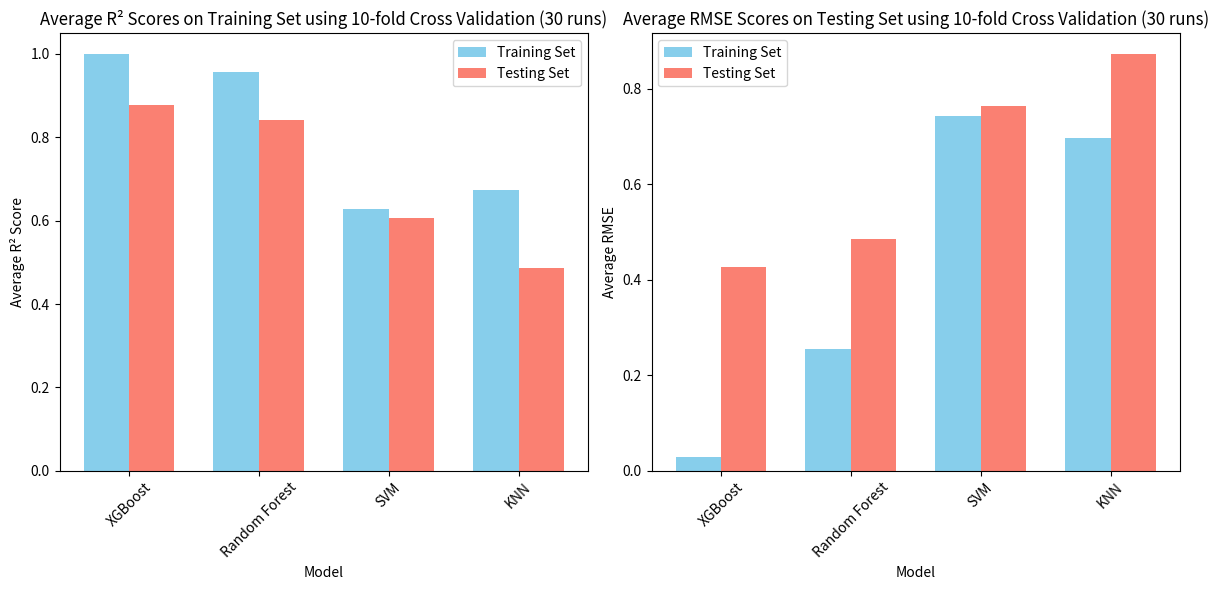

Text(0, 0.5, '預測值')

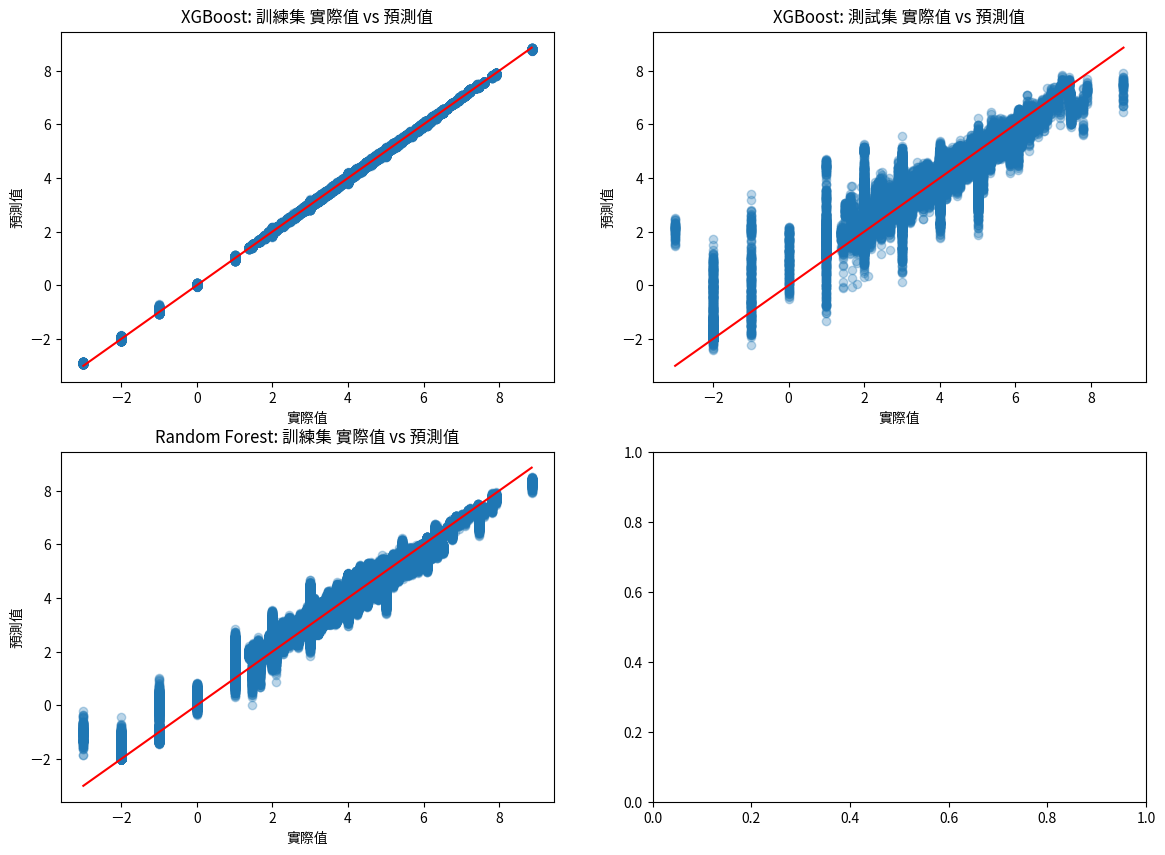

In [50]:
# 定義特徵和目標變量
X = cleaned_df.drop(columns=['3-predicted IU'])
Y = cleaned_df['3-predicted IU']

# 定義模型
xgb_model = xgboost.XGBRegressor(
    learning_rate=0.1,  # 學習速率
    n_estimators=100,   # 樹的數量
    max_depth=10,       # 樹的最大深度
    subsample=0.8,      # 子樣本比例
    colsample_bytree=0.8,  # 每棵樹的特徵採樣比例
    random_state=42     # 隨機種子
)
rf_model = RandomForestRegressor(
    n_estimators=100,   # 樹的數量
    max_depth=10,       # 樹的最大深度
    min_samples_split=2,  # 內部節點再劃分所需的最小樣本數
    min_samples_leaf=1,   # 葉子節點所需的最小樣本數
    random_state=42     # 隨機種子
)
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
knn_model = KNeighborsRegressor(n_neighbors=5)

models = {
    'XGBoost': xgb_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model
}

# 初始化存儲分數和預測結果的字典
r2_scores_train = {name: [] for name in models.keys()}
rmse_scores_train = {name: [] for name in models.keys()}
r2_scores_test = {name: [] for name in models.keys()}
rmse_scores_test = {name: [] for name in models.keys()}
predictions_all = {name: [] for name in models.keys()}
train_predictions = {name: [] for name in models.keys()}
test_predictions = {name: [] for name in models.keys()}
train_actuals = []
test_actuals = []

# 進行30次模型運行
for run in range(30):
    # 使用ShuffleSplit進行交叉驗證
    kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=run)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        for name, model in models.items():
            # 訓練模型
            model.fit(X_train, Y_train)

            # 對訓練集進行預測
            predictions_train = model.predict(X_train)
            train_predictions[name].extend(predictions_train)

            # 對測試集進行預測
            predictions_test = model.predict(X_test)
            test_predictions[name].extend(predictions_test)

            # 計算訓練集和測試集的R²和RMSE
            r2_scores_train[name].append(r2_score(Y_train, predictions_train))
            rmse_scores_train[name].append(mean_squared_error(Y_train, predictions_train, squared=False))
            r2_scores_test[name].append(r2_score(Y_test, predictions_test))
            rmse_scores_test[name].append(mean_squared_error(Y_test, predictions_test, squared=False))

            # 存儲所有預測結果和實際值以供比較
            predictions_all[name].extend(predictions_test)

        # 儲存訓練集和測試集實際值
        train_actuals.extend(Y_train)
        test_actuals.extend(Y_test)

# 計算訓練集和測試集R²和RMSE的平均值
mean_r2_scores_train = {name: np.mean(scores) for name, scores in r2_scores_train.items()}
mean_rmse_scores_train = {name: np.mean(scores) for name, scores in rmse_scores_train.items()}
mean_r2_scores_test = {name: np.mean(scores) for name, scores in r2_scores_test.items()}
mean_rmse_scores_test = {name: np.mean(scores) for name, scores in rmse_scores_test.items()}

# 繪製R²和RMSE分數的折線圖
plt.figure(figsize=(12, 6))

# Plot average R² scores line plot for training set
plt.subplot(2, 2, 1)
plt.plot(list(mean_r2_scores_train.keys()), list(mean_r2_scores_train.values()), marker='o', label='Training Set')
plt.title('Average R² on Training Set using 10-fold Cross Validation (30 runs)')
plt.xlabel('Model')
plt.ylabel('Average R² Score')
plt.legend()

# Plot average RMSE scores line plot for training set
plt.subplot(2, 2, 2)
plt.plot(list(mean_rmse_scores_train.keys()), list(mean_rmse_scores_train.values()), marker='o', label='Training Set')
plt.title('Average RMSE on Training Set using 10-fold Cross Validation (30 runs)')
plt.xlabel('Model')
plt.ylabel('Average RMSE')
plt.legend()

# Plot average R² scores line plot for testing set
plt.subplot(2, 2, 3)
plt.plot(list(mean_r2_scores_test.keys()), list(mean_r2_scores_test.values()), marker='o', label='Testing Set')
plt.title('Average R² on Testing Set using 10-fold Cross Validation (30 runs)')
plt.xlabel('Model')
plt.ylabel('Average R² Score')
plt.legend()

# Plot average RMSE scores line plot for testing set
plt.subplot(2, 2, 4)
plt.plot(list(mean_rmse_scores_test.keys()), list(mean_rmse_scores_test.values()), marker='o', label='Testing Set')
plt.title('Average RMSE on Testing Set using 10-fold Cross Validation (30 runs)')
plt.xlabel('Model')
plt.ylabel('Average RMSE')
plt.legend()

plt.tight_layout()
plt.show()

# 繪製平均 R² 和 RMSE 分數的直方圖
plt.figure(figsize=(12, 6))

# Plot average R² scores histogram
plt.subplot(1, 2, 1)
bar_width = 0.35
index = np.arange(len(mean_r2_scores_train))
plt.bar(index, mean_r2_scores_train.values(), bar_width, label='Training Set', color='skyblue')
plt.bar(index + bar_width, mean_r2_scores_test.values(), bar_width, label='Testing Set', color='salmon')
plt.title('Average R² Scores on Training Set using 10-fold Cross Validation (30 runs)')
plt.xlabel('Model')
plt.ylabel('Average R² Score')
plt.xticks(index + bar_width / 2, mean_r2_scores_train.keys(), rotation=45)
plt.legend()

# Plot average RMSE scores histogram
plt.subplot(1, 2, 2)
plt.bar(index, mean_rmse_scores_train.values(), bar_width, label='Training Set', color='skyblue')
plt.bar(index + bar_width, mean_rmse_scores_test.values(), bar_width, label='Testing Set', color='salmon')
plt.title('Average RMSE Scores on Testing Set using 10-fold Cross Validation (30 runs)')
plt.xlabel('Model')
plt.ylabel('Average RMSE')
plt.xticks(index + bar_width / 2, mean_rmse_scores_train.keys(), rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# 繪製XGBoost和Random Forest的實際值與預測值的散點圖
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 繪製XGBoost訓練集實際值與預測值的散點圖
axs[0, 0].scatter(train_actuals, train_predictions['XGBoost'], alpha=0.3)
axs[0, 0].plot([min(train_actuals), max(train_actuals)], [min(train_actuals), max(train_actuals)], color='red')
axs[0, 0].set_title('XGBoost: 訓練集 實際值 vs 預測值')
axs[0, 0].set_xlabel('實際值')
axs[0, 0].set_ylabel('預測值')

# 繪製XGBoost測試集實際值與預測值的散點圖
axs[0, 1].scatter(test_actuals, test_predictions['XGBoost'], alpha=0.3)
axs[0, 1].plot([min(test_actuals), max(test_actuals)], [min(test_actuals), max(test_actuals)], color='red')
axs[0, 1].set_title('XGBoost: 測試集 實際值 vs 預測值')
axs[0, 1].set_xlabel('實際值')
axs[0, 1].set_ylabel('預測值')

# 繪製Random Forest訓練集實際值與預測值的散點圖
axs[1, 0].scatter(train_actuals, train_predictions['Random Forest'], alpha=0.3)
axs[1, 0].plot([min(train_actuals), max(train_actuals)], [min(train_actuals), max(train_actuals)], color='red')
axs[1, 0].set_title('Random Forest: 訓練集 實際值 vs 預測值')
axs[1, 0].set_xlabel('實際值')
axs[1, 0].set_ylabel('預測值')

In [68]:
print("r2_scores_train : ",mean_r2_scores_train)
print("mean_rmse_scores_train : ",mean_rmse_scores_train)
print("mean_r2_scores_test : ",mean_r2_scores_test)
print("mean_rmse_scores_test : ",mean_rmse_scores_test)

r2_scores_train :  {'XGBoost': 0.9994781189097026, 'Random Forest': 0.9558638664813435, 'SVM': 0.6276736699858235, 'KNN': 0.6735452325753352}
mean_rmse_scores_train :  {'XGBoost': 0.027724529795205993, 'Random Forest': 0.2557855605401761, 'SVM': 0.7431159574339534, 'KNN': 0.6957918752886961}
mean_r2_scores_test :  {'XGBoost': 0.8770445745864286, 'Random Forest': 0.8409729590183921, 'SVM': 0.6070629457437409, 'KNN': 0.4875802305674133}
mean_rmse_scores_test :  {'XGBoost': 0.4263290428269853, 'Random Forest': 0.4849371720302427, 'SVM': 0.7643955645910981, 'KNN': 0.8723158319995226}


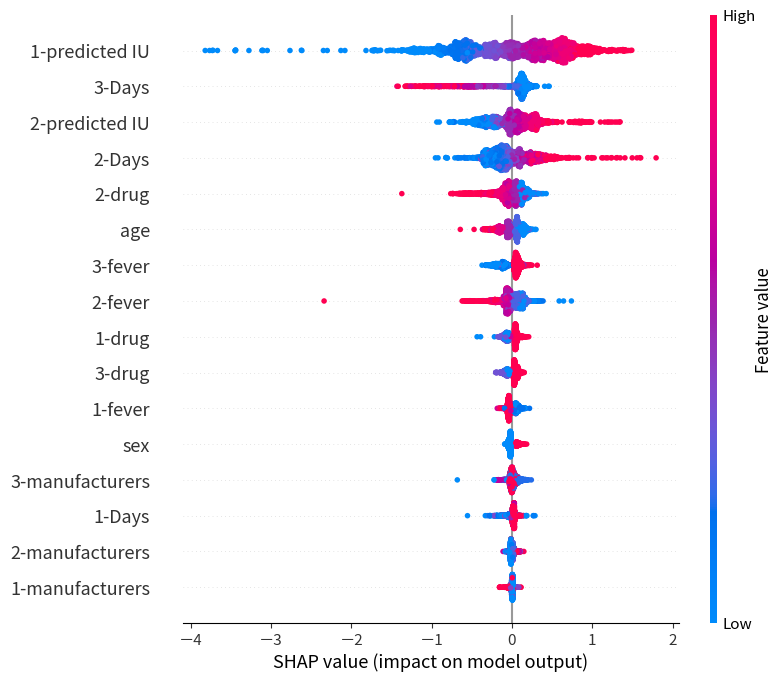

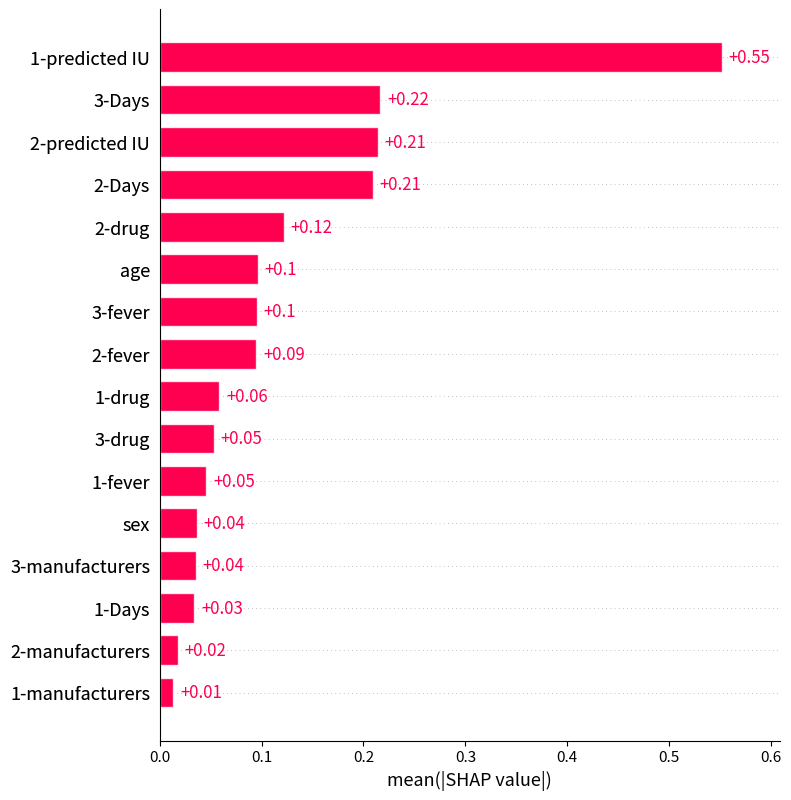

In [164]:
# 訓練XGBoost模型
xgb_model.fit(X, Y)

# 使用SHAP解釋XGBoost模型
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)

# 畫出beeswarm圖
shap.plots.beeswarm(shap_values, max_display=X.shape[1])

# 畫出barplot圖
shap.plots.bar(shap_values, max_display=20)

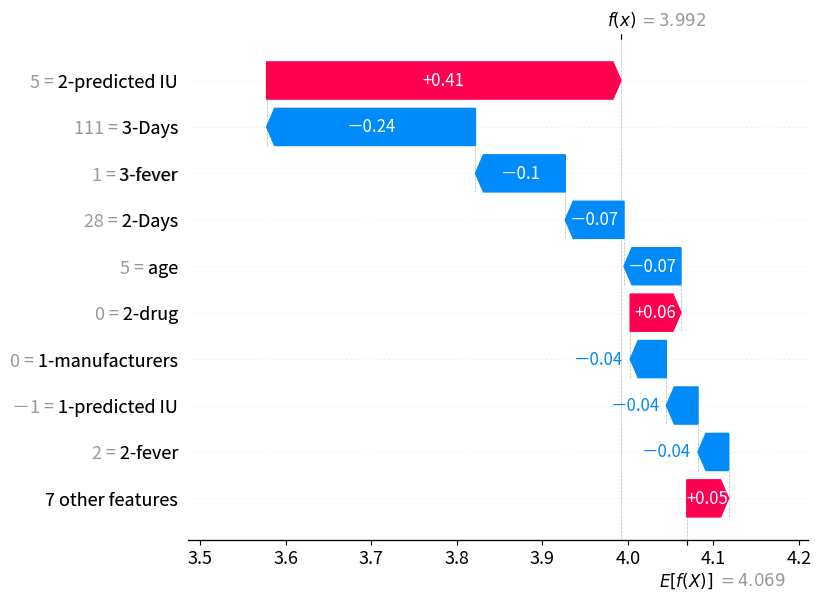

In [166]:
shap.plots.waterfall(shap_values[3])

#找單筆資料SHAP訓練出來的單筆資料位置

In [157]:
#找出第三劑IU且其他欄位沒有空值的原始資料

# 替換成自己的文件路徑
with open('/content/drive/MyDrive/test1.csv', 'rb') as f:
    result = chardet.detect(f.read())

# 使用檢測到的編碼方式讀取 CSV 文件
df = pd.read_csv('/content/drive/MyDrive/test1.csv', encoding=result['encoding'])

# 選擇需要的欄位
selected_df = df[['age', 'sex',
       '1-manufacturers', '1-Days', '1-fever', '1-drug', '1-predicted IU',
       '2-manufacturers', '2-Days', '2-fever', '2-drug', '2-predicted IU',
       '3-manufacturers', '3-Days', '3-fever', '3-drug', '3-predicted IU']]

# 定義中文欄位名稱的字典
chinese_columns = {
    'age': '年齡',
    'sex': '性別',
    '1-manufacturers': '第一劑廠牌',
    '1-Days': '第一劑間隔天數',
    '1-fever': '第一劑發燒情況',
    '1-drug': '第一劑是否用藥物',
    '1-predicted IU': '第一劑 IU',
    '2-manufacturers': '第二劑廠牌',
    '2-Days': '第二劑間隔天數',
    '2-fever': '第二劑發燒情況',
    '2-drug': '第二劑是否用藥物',
    '2-predicted IU': '第二劑 IU',
    '3-manufacturers': '第三劑廠牌',
    '3-Days': '第三劑間隔天數',
    '3-fever': '第三劑發燒情況',
    '3-drug': '第三劑是否用藥物',
    '3-predicted IU': '第三劑 IU'
}

# 重命名欄位名稱
new_df = selected_df.rename(columns=chinese_columns)

# 移除含有 NA 的行
cleaned_df = new_df.dropna()

# 建立空列表來存儲表格每一行的資料
table_data = []

# 生成表格每一行的資料
for i, (index, row) in enumerate(cleaned_df.iterrows(), 1):
    row_data = []
    row_data.append(f"第{index}筆資料 :")
    for col, value in row.items():
        if isinstance(value, (int, float)):
            formatted_value = f"{value:.2f}"
        else:
            formatted_value = str(value)
        if formatted_value.strip():  # 檢查值是否為空，如果不是空就加入表格
            row_data.append(f"{col}: {formatted_value}")
    table_data.append(row_data)

# 使用 tabulate 印出表格
table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")
print(table)

╒════════════════╤════════════╤═══════════╤═════════════════╤══════════════════════╤═════════════════════╤═══════════════════════╤═══════════════════════╤══════════════════════╤═════════════════════════╤════════════════════════╤══════════════════════════╤═══════════════════════╤═══════════════════╤══════════════════════════╤═════════════════════╤═══════════════════════╤═════════════════════╕
│ 第3筆資料 :    │ 年齡: 55   │ 性別: 0   │ 第一劑廠牌: 0   │ 第一劑間隔天數: 50   │ 第一劑發燒情況: 2   │ 第一劑是否用藥物: 1   │ 第一劑 IU: 26.63      │ 第二劑廠牌: 2        │ 第二劑間隔天數: 28.00   │ 第二劑發燒情況: 2.00   │ 第二劑是否用藥物: 0.00   │ 第二劑 IU: 1165.26    │ 第三劑廠牌: 2     │ 第三劑間隔天數: 111.00   │ 第三劑發燒情況: 0   │ 第三劑是否用藥物: 0   │ 第三劑 IU: 629.33   │
╞════════════════╪════════════╪═══════════╪═════════════════╪══════════════════════╪═════════════════════╪═══════════════════════╪═══════════════════════╪══════════════════════╪═════════════════════════╪════════════════════════╪══════════════════════════╪═══════════════════════╪═══════════════════╪═════════

In [158]:
shap_values_list = []

# 假設 shuffled_df 是你的原始資料框架
for idx, shap_value in enumerate(shap_values):
    feature_values = []
    feature_values.append(f"SHAP values for sample {idx}:")
    feature_values.append(f"Base value: {shap_value.base_values:.4f}")

    # 獲取特徵的原始值
    original_values = shap_value.data

    # 將特徵原始值添加到列表中
    for feature, original_value in zip(shuffled_df.columns, original_values):
        feature_values.append(f"{feature}: {original_value}")

    shap_values_list.append(feature_values)

# 印出結果
print(shap_values_list[0])

['SHAP values for sample 0:', 'Base value: 4.0688', '年齡: 5.0', '性別: 1.0', '第一劑廠牌: 0.0', '第一劑間隔天數: 23.0', '第一劑發燒情況: 6.0', '第一劑是否用藥物: 4.0', '第一劑 IU: -3.0', '第二劑廠牌: 0.0', '第二劑間隔天數: 17.0', '第二劑發燒情況: 0.0', '第二劑是否用藥物: 0.0', '第二劑 IU: 2.0', '第三劑廠牌: 2.0', '第三劑間隔天數: 198.0', '第三劑發燒情況: 6.0', '第三劑是否用藥物: 3.0']


In [162]:
# 要尋找的條件
target_conditions = [
    '第三劑間隔天數: 111.00',
    '第三劑廠牌: 2'
]

# 在 table_data 中找到符合所有條件的資料索引
indices = []
for idx, data in enumerate(table_data):
    if all(cond in data for cond in target_conditions):
        indices.append(idx)

# 印出在 table_data 中找到的資料
for idx in indices:
    print(f"在 table_data 中找到符合條件的資料在索引 {idx} : {table_data[idx]}")

# 在 shap_values_list 中找符合所有條件的資料索引
indices = []
for idx, shap_values in enumerate(shap_values_list):
  if shap_values[-3] == '第三劑間隔天數: 111.0' and shap_values[-4] == '第三劑廠牌: 2.0':
    indices.append(idx)

for idx in indices:
  print(f"在 shap_values_list 中找到符合條件的資料在索引 {idx} : {shap_values_list[idx]}")

在 table_data 中找到符合條件的資料在索引 0 : ['第3筆資料 :', '年齡: 55', '性別: 0', '第一劑廠牌: 0', '第一劑間隔天數: 50', '第一劑發燒情況: 2', '第一劑是否用藥物: 1', '第一劑 IU: 26.63', '第二劑廠牌: 2', '第二劑間隔天數: 28.00', '第二劑發燒情況: 2.00', '第二劑是否用藥物: 0.00', '第二劑 IU: 1165.26', '第三劑廠牌: 2', '第三劑間隔天數: 111.00', '第三劑發燒情況: 0', '第三劑是否用藥物: 0', '第三劑 IU: 629.33']
在 table_data 中找到符合條件的資料在索引 32 : ['第489筆資料 :', '年齡: 24', '性別: 0', '第一劑廠牌: 1', '第一劑間隔天數: 28', '第一劑發燒情況: 2', '第一劑是否用藥物: 0', '第一劑 IU: 427.24', '第二劑廠牌: 1', '第二劑間隔天數: 93.00', '第二劑發燒情況: 3.00', '第二劑是否用藥物: 0.00', '第二劑 IU: 384.5', '第三劑廠牌: 2', '第三劑間隔天數: 111.00', '第三劑發燒情況: 2', '第三劑是否用藥物: 0', '第三劑 IU: 371.09']
在 shap_values_list 中找到符合條件的資料在索引 3 : ['SHAP values for sample 3:', 'Base value: 4.0688', '年齡: 5.0', '性別: 0.0', '第一劑廠牌: 0.0', '第一劑間隔天數: 47.0', '第一劑發燒情況: 3.0', '第一劑是否用藥物: 3.0', '第一劑 IU: -1.0', '第二劑廠牌: 2.0', '第二劑間隔天數: 28.0', '第二劑發燒情況: 2.0', '第二劑是否用藥物: 0.0', '第二劑 IU: 5.0', '第三劑廠牌: 2.0', '第三劑間隔天數: 111.0', '第三劑發燒情況: 1.0', '第三劑是否用藥物: 1.0']
在 shap_values_list 中找到符合條件的資料在索引 489 : ['SHAP values for sample 489:'

#無填補

In [65]:
# 使用 chardet 檢測 CSV 文件的編碼方式
with open('/content/drive/MyDrive/test1.csv', 'rb') as f:
    result = chardet.detect(f.read())

# 印出檢測結果
#print(result)

# 使用檢測到的編碼方式讀取 CSV 文件
df = pd.read_csv('/content/drive/MyDrive/test1.csv', encoding=result['encoding'])

# 挑選出不含"4-"和"5-"的欄位名稱
#selected_columns = [col for col in df.columns if '4-' not in col and '5-' not in col and 'Before-vaccination-MeDipro-predicted-IU' not in col]
selected_df = df[['age', 'sex',
       '1-manufacturers', '1-Days', '1-fever', '1-drug', '1-predicted IU',
       '2-manufacturers', '2-Days', '2-fever', '2-drug', '2-predicted IU',
       '3-manufacturers', '3-Days', '3-fever', '3-drug', '3-predicted IU']]
# 使用選擇的欄位創建新的DataFrame
#new_df = df[selected_columns]
new_df = selected_df

cleaned_df = new_df.replace('\u3000', np.nan) # \u3000 = 空格

bins = [0, 19, 29, 39, 49, 59, 69, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7]

# 使用 cut 函數來根據年齡的區間區分生命階段並直接替換原始的 'age' 欄位
cleaned_df['age'] = cleaned_df['age'].astype(float) # 轉換成float
cleaned_df['age'] = pd.cut(cleaned_df['age'], bins=bins, labels=labels, right=True)

# 進行運算，四捨五入
cleaned_df['1-predicted IU'] = cleaned_df['1-predicted IU'].astype(float) # 轉換成float
cleaned_df['1-predicted IU'] = round(np.log2(cleaned_df['1-predicted IU'] / 40))
cleaned_df['2-predicted IU'] = cleaned_df['2-predicted IU'].astype(float) # 轉換成float
cleaned_df['2-predicted IU'] = round(np.log2(cleaned_df['2-predicted IU'] / 40))
cleaned_df['3-predicted IU'] = cleaned_df['3-predicted IU'].astype(float) # 轉換成float
cleaned_df['3-predicted IU'] = round(np.log2(cleaned_df['3-predicted IU'] / 40))

# Identify columns with string values
string_columns = cleaned_df.select_dtypes(include=['object']).columns

# Create a dictionary to store label encoders for each column
label_encoders = {}

# Apply label encoding to each column with string values
for col in string_columns:
    label_encoder = LabelEncoder()
    cleaned_df[col] = label_encoder.fit_transform(cleaned_df[col])
    label_encoders[col] = label_encoder

cleaned_df = cleaned_df.astype(float) # 轉換成float

In [81]:
# 將清理後的 DataFrame 分為特徵矩陣 X 和目標向量 Y
X = cleaned_df.drop(columns=['3-predicted IU'])
Y = cleaned_df['3-predicted IU']

# 檢查 Y 中是否存在 NaN、無窮大值或過大值
#print(Y.isnull().sum())  # 檢查 NaN 值的數量
#print(np.isinf(Y).sum())  # 檢查無窮大值的數量
#print((Y > 1e6).sum())  # 檢查過大值的數量

# 移除包含 NaN、無窮大值或過大值的行
Y = Y.dropna()
Y = Y.replace([np.inf, -np.inf], np.nan).dropna()
Y = Y[Y <= 1e6]  # 移除過大值

# 將索引與 X 同步
X = X.loc[Y.index]

# 重新定義特徵矩陣 X
X = X.astype(float)

# 定義模型列表
models = {
    'XGBoost': xgboost.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=10, subsample=0.8, colsample_bytree=0.8, random_state=0, missing=np.nan),
    'Random Forest': HistGradientBoostingRegressor(max_iter=100, max_depth=10, random_state=0),
    'SVM': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# 使用 SimpleImputer 將空值填補為 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_imputed = imputer.fit_transform(X)

# 初始化陣列來存儲分數
scores_train = {model_name: {'r2': [], 'rmse': []} for model_name in models}
scores_test = {model_name: {'r2': [], 'rmse': []} for model_name in models}

# 進行30次模型運行
for _ in range(30):
    # 使用 ShuffleSplit 進行交叉驗證，每次迭代都使用不同的隨機種子
    kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=_)

    for train_index, test_index in kf.split(X_imputed):
        X_train, X_test = X_imputed[train_index], X_imputed[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        for model_name, model in models.items():
            # 訓練模型
            model.fit(X_train, Y_train)

            # 計算訓練集和測試集的 R² 和 RMSE 分數
            train_r2 = model.score(X_train, Y_train)
            test_r2 = model.score(X_test, Y_test)
            train_rmse = np.sqrt(mean_squared_error(Y_train, model.predict(X_train)))
            test_rmse = np.sqrt(mean_squared_error(Y_test, model.predict(X_test)))

            # 將分數存儲到陣列中
            scores_train[model_name]['r2'].append(train_r2)
            scores_train[model_name]['rmse'].append(train_rmse)
            scores_test[model_name]['r2'].append(test_r2)
            scores_test[model_name]['rmse'].append(test_rmse)

# 計算 R² 和 RMSE 的平均值
mean_r2_scores_train = {model_name: np.mean(scores_train[model_name]['r2']) for model_name in models}
mean_r2_scores_test = {model_name: np.mean(scores_test[model_name]['r2']) for model_name in models}
mean_rmse_scores_train = {model_name: np.mean(scores_train[model_name]['rmse']) for model_name in models}
mean_rmse_scores_test = {model_name: np.mean(scores_test[model_name]['rmse']) for model_name in models}

# 印出訓練集和測試集的平均 R² 和 RMSE 分數
for model_name in models:
    print(f"{model_name} - Training R² Scores (30 runs average): {mean_r2_scores_train[model_name]:.4f}")
    print(f"{model_name} - Testing R² Scores (30 runs average): {mean_r2_scores_test[model_name]:.4f}")
    print(f"{model_name} - Training RMSE Scores (30 runs average): {mean_rmse_scores_train[model_name]:.4f}")
    print(f"{model_name} - Testing RMSE Scores (30 runs average): {mean_rmse_scores_test[model_name]:.4f}")

XGBoost - Training R² Scores (30 runs average): 0.9899
XGBoost - Testing R² Scores (30 runs average): 0.3871
XGBoost - Training RMSE Scores (30 runs average): 0.1394
XGBoost - Testing RMSE Scores (30 runs average): 1.0818
Random Forest - Training R² Scores (30 runs average): 0.7868
Random Forest - Testing R² Scores (30 runs average): 0.3886
Random Forest - Training RMSE Scores (30 runs average): 0.6413
Random Forest - Testing RMSE Scores (30 runs average): 1.0813
SVM - Training R² Scores (30 runs average): 0.0308
SVM - Testing R² Scores (30 runs average): -0.0010
SVM - Training RMSE Scores (30 runs average): 1.3684
SVM - Testing RMSE Scores (30 runs average): 1.3886
KNN - Training R² Scores (30 runs average): 0.4026
KNN - Testing R² Scores (30 runs average): 0.0728
KNN - Training RMSE Scores (30 runs average): 1.0741
KNN - Testing RMSE Scores (30 runs average): 1.3331
